# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель: установить параметры, по которым можно будет определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных

In [1]:
# импортируем библиотеку pandas

import pandas as pd

In [2]:
# сохраним данные в датафрейме

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# увеличим максимальное количество отображающихся столбцов

pd.set_option('display.max_columns', 50)

In [4]:
# просмотрим общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра Санкт-Петербурга (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации 

`floor` — этаж 

`floors_total` — всего этажей в доме 

`is_apartment` — апартаменты (булев тип) 

`kitchen_area` — площадь кухни в квадратных метрах (м²) 

`last_price` — цена на момент снятия с публикации 

`living_area` — жилая площадь в квадратных метрах (м²) 

`locality_name` — название населённого пункта 

`open_plan` — свободная планировка (булев тип) 

`parks_around3000` — число парков в радиусе 3 км 

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км 

`ponds_nearest` — расстояние до ближайшего водоёма (м) 

`rooms` — число комнат 

`studio` — квартира-студия (булев тип) 

`total_area` — общая площадь квартиры в квадратных метрах (м²) 

`total_images` — число фотографий квартиры в объявлении

In [5]:
# просмотрим первые 10 строк датафрейма

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


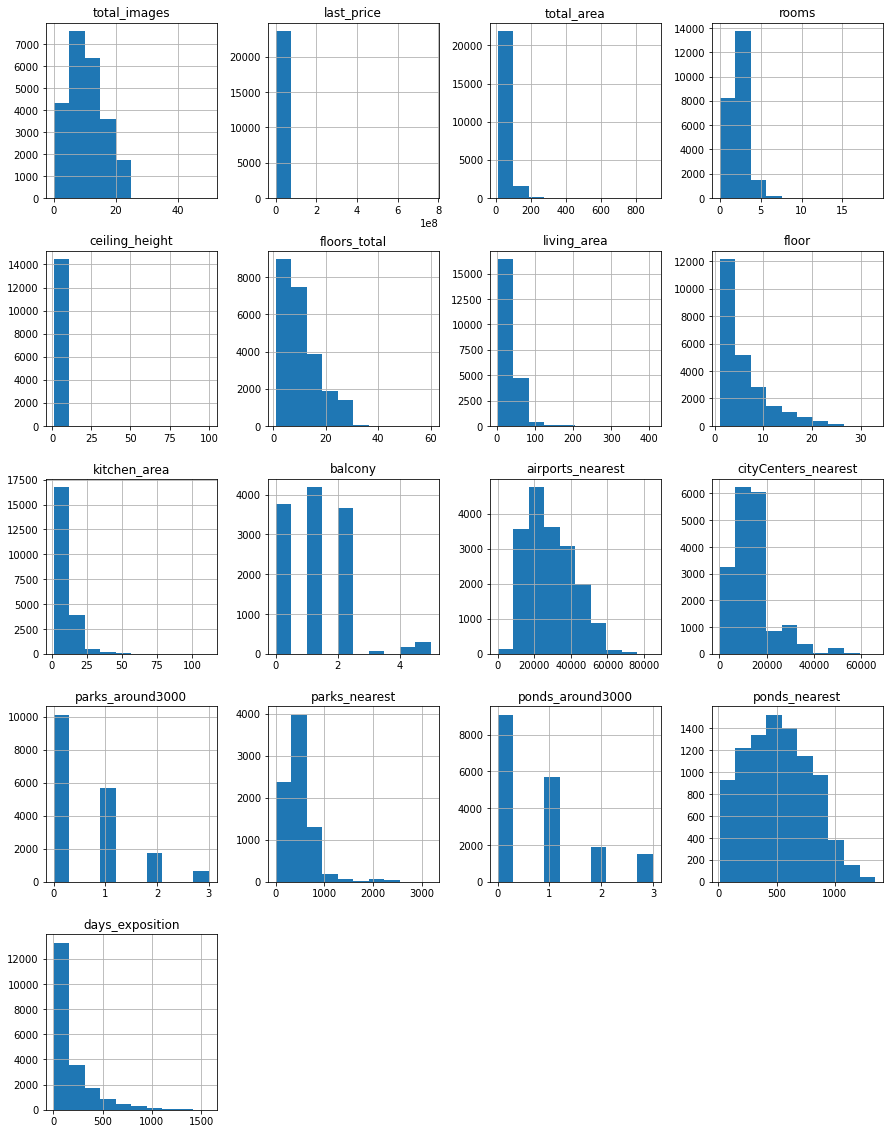

In [6]:
# построим гистограммы для всех столбцов датафрейма с числовыми значениями

df.hist(figsize=(15, 20));

## Предобработка данных

### Обработка пропусков

In [7]:
# определим количество пропусков в каждом столбце

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в 14 столбцах. Попробуем заполнить пропуски, в случае невозможности сделать это - оставим как есть или удалим строки.

Для начала определим, **какие из данных являются наиболее важными - пропуски в таких данных могут исказить результаты исследования**, а какие - менее значительными, пропуски в которых можно оставить.
Изучив Series с количеством пропусков из вышележащей ячейки, можно прийти к выводу, что **единственными столбцами, пропуски в которых могут повлиять на исследование**, являются **locality_name - наименование населенного пункта**, и **cityCenters_nearest - расстояние до центра Санкт-Петербурга**. Сложно представить, чтобы потенциальный клиент проявил желание купить квартиру, которая находится непонятно в каком городе. Касательно данных о расстоянии до центра Санкт-Петербурга следует отметить, что они наиболее важны только для объявлений из Санкт-Петербурга - для объявлений из пригородов отсутствие информации в cityCenters_nearest не критично, т.к. определяющим фактором для таких объявлений в плане расстояния до центра Санкт-Петербурга будут данные с названиями населенных пунктов.

С другой стороны, вряд ли для большинства клиентов отсутствие информации о высоте потолков, расстоянии до ближайшего аэропорта, количестве парков и водоемов в радиусе 3 км стало бы непреодолимой преградой. Более важные данные с пропусками - такие как жилая площадь квартиры, площадь кухни, принадлежность квартиры к типу apartment - с одной стороны, и количество этажей в доме - с другой, также вряд ли станут решающими для клиента факторами при покупке квартиры ввиду отсутствия пропусков в данных об общей площади квартиры с одной стороны, и этаже квартиры с другой.

Учитывая вышеизложенное, **в случае невозможности заполнения пропусков в столбцах locality_name и cityCenters_nearest, соответствующие строки в датафрейме придется удалить** во избежание искажения результатов исследования.

**Строки с пропусками в остальных столбцах**, в случае невозможности заполнения этих пропусков, **следует оставить**, т.к. такие пропуски не могут оказать существенного влияния на результаты исследования.

#### is_apartment

Выдвигаю гипотезу о зависимости площади квартиры от ее принадлжености к типу apartment. Если гипотеза подтвердится, то пропуски в столбце is_apartment можно будет заполнить на булевы значения в зависимости от размера квартиры.

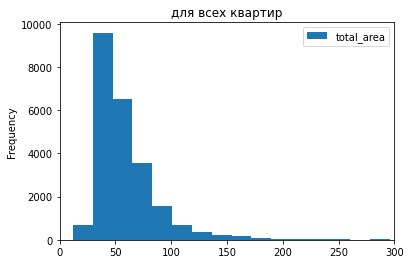

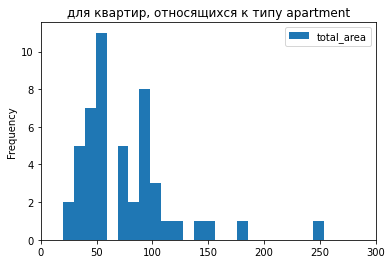

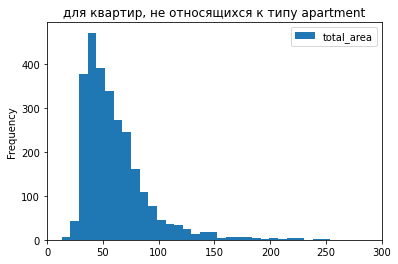

In [8]:
# выведем три гистограммы для столбца total_area - для всех квартир

df.plot(y='total_area', kind='hist', bins=50, xlim=(0, 300), title='для всех квартир');

# для квартир, относящихся к типу apartment

df.query('is_apartment == 1').plot(y='total_area', kind='hist', bins=50, xlim=(0, 300), \
                                   title='для квартир, относящихся к типу apartment');

# для квартир, не относящихся к типу apartment

df.query('is_apartment == 0').plot(y='total_area', kind='hist', bins=50, xlim=(0, 300), \
                                   title='для квартир, не относящихся к типу apartment');

Ознакомившись с гистограммами, можно сделать вывод об отсутствии зависимости площади квартиры от ее принадлжености к типу apartment.

В таком случае можно сделать предположение, что пропуски связаны с тем, что квартира не относится к типу apartment.




In [9]:
# количество пропусков в столбце is_apartment

df['is_apartment'].isna().sum()

20924

In [10]:
# и количество строк в датафрейме

len(df)

23699

In [11]:
# выведем количество значений True в столбце is_apartment

len(df.query('is_apartment == 1'))

50

In [12]:
# и количество значений False 

len(df.query('is_apartment == 0'))

2725

Логика и цифры подсказывают, что предположение верно: количество пропусков в столбце - 20924, всего строк в датафрейме - 23699. А в тех строках, где значения не пропущены, апартаментов в 40 раз меньше, чем не апартаментов.

В таком случае **заполним пропуски значениями False**.

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### balcony

Скорее всего, пропуски в данных связаны с отсутствием балкона в квартире. В таком случае **пропуски можно заполнить нулями**.

In [14]:
# заполним пропуски в столбце balcony нулями

df['balcony'] = df['balcony'].fillna('0')

In [15]:
# проверим наличие пропусков в balcony

df['balcony'].isna().sum()

0

#### ceiling_height

Выдвигаю гипотезу о том, что в домах с небольшим количеством этажей (от 1 до 4) потолки должны быть выше среднего значения. Если гипотеза подтвердится, то пропуски в столбце ceiling_height для квартир в таких домах можно будет заполнить на средние значения высоты потолка в домах с небольшим количеством этажей.

Однако, прежде чем переходить к построению гистограмм для выборок данных по floors_total, следует рассчитать коэффициент корреляции Пирсона, чтобы определить наличие или отсутствие взаимосвязи между столбцами ceiling_height и floors_total.

In [16]:
# выведем коэффициент корреляции Пирсона для столбцов ceiling_height и floors_total

df['ceiling_height'].corr(df['floors_total'])

-0.028731894622727384

Коэффициент корреляции составляет -0.03. Это говорит о том, что связь между количеством этажей и высотой потолков либо отсутствует, либо имеет более сложный характер. Т.к. в датафрейме нет еще одного такого параметра, который, по логике, мог бы быть взаимосвязан с высотой потолков, то принимаем, что связи между количеством этажей и высотой потолков нет.

В таком случае **заменим пропуски в столбце ceiling_height на медианное значение, однако сделаем это после того, как избавимся от аномальных значений, которые, судя по гистограмме для столбца ceiling_height, имеют место**.

#### floors_total

В датафрейме отсутствуют параметры, которые могут быть логически взаимосвязаны с количеством этажей в доме, следовательно, заполнить пропуски в столбце floors_total усредненными данными по связанным параметрам (например, методом группировки) не представляется возможным.

В то же время, заполнять такие пропуски средним или медианным значение нельзя, т.к. это сильно исказит исходные данные. **Оставим пропуски**.

#### living_area 

Выдвигаю гипотезу о зависимости жилой площади квартиры от ее общей площади. Если гипотеза подтвердится и будет найдено доминирующее значение отношения жилой площади квартиры к ее общей площади, то пропуски в столбце living_area можно будет заполнить на рассчитанное значение общей площади квартиры на данное доминирующее значение.

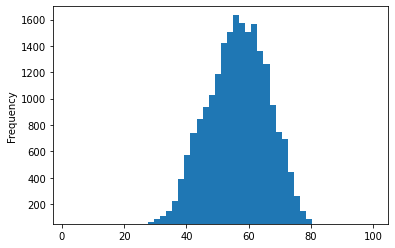

In [17]:
# построим гистограмму отношения жилой площади квартиры к ее общей площади 

((df['living_area'] / df['total_area']) * 100).plot(kind='hist', style='o', bins=50, ylim=(50, 1700));

Из гистограммы отношения жилой площади квартиры к ее общей площади (далее - отношение) видно, что чаще всего отношение составляет 50-65%. Однако гистограмма имеет довольно широкий размах как для значений с частотой 50 и более - около 52%, так и для значений с частотой более 200 - порядка 40%.

Следовательно, делать выводы о наличии взаимосвязи между жилой площадью квартиры и ее общей площадью нельзя. **Пропуски в столбце ceiling_height оставим**.

#### kitchen_area

В датафрейме отсутствуют параметры, которые могут быть логически взаимосвязаны с площадью кухни, следовательно, заполнить пропуски в столбце kitchen_area усредненными данными по связанным параметрам не представляется возможным.
В то же время, заполнять такие пропуски средним или медианным значение нельзя, т.к. это сильно исказит исходные данные. **Оставим пропуски**.

#### locality_name

В датафрейме отсутствуют параметры, которые могут быть логически взаимосвязаны с наименованием населенного пункта, следовательно, заполнить пропуски в столбце locality_name по связанным параметрам не представляется возможным. В то же время, заполнять такие пропуски средним или медианным значение нельзя, т.к. значения в столбце имеют тип object.

С учетом того, что данные в столбце locality_name были отнесены к наиболее важными - пропуски в таких данных могут исказить результаты исследования, **строки с такими пропусками следует удалить**.

Т.к. количество пропусков в locality_name составляет 49, а общее количество строк в датафрейме - 23699, то избавившись от строк с такими пропусками мы потеряем лишь 0.2% исходных данных.

In [18]:
# удалим пропуски в locality_name

df = df.dropna(subset=['locality_name'])

In [19]:
# проверим наличие пропусков в locality_name

df['locality_name'].isna().sum()

0

#### cityCenters_nearest

Для того чтобы обработать пропуски в столбце **cityCenters_nearest - расстояние до центра города - Санкт-Петербурга** - необходимо провести следующее логическое размышление. Прежде всего, в датафрейме следует найти данные (столбцы), которые могут быть взаимосвязаны с данными из столбца cityCenters_nearest и по которым можно заполнить пропуски в данном столбце. С позиции логики таким параметром является locality_name - наименование населенного пункта.
Далее о связи cityCenters_nearest и  locality_name. Данные в датафрейме собраны по Санкт-Петербургу и пригородам. Логично предположить, что пригороды имеют несопоставимо малую в сравнении с Санкт-Петербургом площадь, а также достаточную удаленность от центра Петербурга. Если это так, пропуски в cityCenters_nearest для каждого пригорода можно заполнить **медианным** значением cityCenters_nearest для данного пригорода.


Проверим данное утверждение. Согласно внешним данным ([1](https://travelask.ru/articles/samye-krupnye-goroda-leningradskoy-oblasti), [2](https://biblio-vyborg.ru/settlements/5-vyborg#:~:text=Выборг%20—%20второй%20по%20населению%20и,мощный%20замок%2C%20получивший%20название%20Выборг)), крупнейшим по площади населенным пунктом Ленинградской области является Выборг. Его площадь составляет [161 квадратный километр](https://ru.wikipedia.org/wiki/Выборг).

Площадь Санкт-Петербурга составляет [1439 квадратных километров](https://ru.wikipedia.org/wiki/Санкт-Петербург), что почти в 9 раз больше площади крупнейшего пригорода.

Исходя из вышеизложенного, можно сделать вывод о справедливости высказанного утверждения, учитывая несопоставимо малую площадь пригородов в сравнении с площадью Санкт-Петербурга, а также [удаленность](https://commons.wikimedia.org/wiki/File:Len_region_map.gif) пригородов от центра Санкт-Петербурга (например, площадь близко расположенного к Петербургу Коммунара составляет [13 квадратных километров](https://ru.wikipedia.org/wiki/Коммунар_(Гатчинский_район)), расстояние до центра Санкт-Петербурга - [43 километра](https://www.avtodispetcher.ru/distance/?from=Коммунар&to=Санкт-Петербург)).

Таким образом, **пропуски в cityCenters_nearest для каждого пригорода заполним медианным значением cityCenters_nearest для данного пригорода**.

In [20]:
# выведем первые 20 населенных пунктов из датафрейма по количеству объявлений

df['locality_name'].value_counts().head(20)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

In [21]:
# рассчитаем количество уникальных населенных пунктов в датафрейме

df['locality_name'].value_counts().count()

364

Также необходимо проверить, нет ли в данных locality_name дубликатов - их наличие может сделать некорректным заполнение пропусков в locality_name.

In [22]:
# выведем и изучим список уникальных значений locality_name

sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Как видно из вывода верхней ячейки, в данных названий населенных пунктов присутствует множество неявных дубликатов. Почти все неявные дубликаты содержат в своем названии производные от слова "поселок". Чтобы устранить неявные дубликаты, напишем специальную функцию, которая будет заменять приставку перед названием населенного пункта - "посёлок", "поселок городского типа" и т.д. на "поселок". Таким образом мы избавимся от большинства неявных дубликатов.

Кроме того, некоторые неявные дубликаты также содержат в названии приставку "садовое товарищество" - ее также следует заменить на "поселок". Для полной унификации изменим также приставку "садоводческое некоммерческое товарищество" на "поселок" - название соответствующего данной приставке населенного пункта хоть и не имеет неявных дубликатов, тем не менее без него список наименований населенных пунктов будет смотреться симпатичнее.

In [23]:
# создадим функцию, которая унифицирует все названия населенных пунктов,
# которые содержат производную от слова "поселок" 

def suburb_improver(elem):
    if 'посёлок' in elem:
        elem = elem.replace('посёлок', 'поселок')
    if 'посёлок городского типа' in elem:
        elem = elem.replace('посёлок городского типа', 'поселок')
    if 'поселок городского типа' in elem:
        elem = elem.replace('поселок городского типа', 'поселок')
    if 'посёлок при железнодорожной станции' in elem:
        elem = elem.replace('посёлок при железнодорожной станции', 'поселок')
    if 'поселок при железнодорожной станции' in elem:
        elem = elem.replace('поселок при железнодорожной станции', 'поселок')
    if 'поселок станции' in elem:
        elem = elem.replace('поселок станции', 'поселок')
    if 'посёлок станции' in elem:
        elem = elem.replace('посёлок станции', 'поселок')
    if 'коттеджный посёлок' in elem:
        elem = elem.replace('коттеджный посёлок', 'поселок')
    if 'коттеджный поселок' in elem:
        elem = elem.replace('коттеджный поселок', 'поселок')
    if 'городской посёлок' in elem:
        elem = elem.replace('городской посёлок', 'поселок')
    if 'городской поселок' in elem:
        elem = elem.replace('городской поселок', 'поселок')
    if 'садовое товарищество' in elem:
        elem = elem.replace('садовое товарищество', 'поселок')
    if 'садоводческое некоммерческое товарищество' in elem:
        elem = elem.replace('садоводческое некоммерческое товарищество', 'поселок')
    return elem

In [24]:
# импортируем библиотеку warnings и вызовем команду simplefilter

import warnings
warnings.simplefilter("ignore")

In [25]:
# применим функцию к столбцу locality_name

df['locality_name'] = df['locality_name'].apply(suburb_improver)

In [26]:
# выведем и изучим обновленный список уникальных значений locality_name

sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [27]:
# отдельно проверим наличие неявных дубликатов для Санкт-Петербурга

counter = 0

for i in df['locality_name'].unique():
    if 'етербург' in i or 'анкт' in i or 'итер' in i:
        counter += 1
        
counter

1

In [28]:
# вновь рассчитаем количество уникальных населенных пунктов в датафрейме

df['locality_name'].value_counts().count()

316

Теперь в locality_name отсутствуют явные и неявные дубликаты. **Заполняем пропуски для пригородов**.

In [29]:
# сделаем контрольную проверку количества пропусков в cityCenters_nearest

df['cityCenters_nearest'].isna().sum()

5511

In [30]:
# создадим цикл, который заполнит пропуски для пригородов
# медианным значением cityCenters_nearest для каждого пригорода

for suburb in df.query('locality_name != "Санкт-Петербург"')['locality_name'].unique():
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == suburb), 'cityCenters_nearest'] = \
    df.groupby('locality_name')['cityCenters_nearest'].median()[suburb]

In [31]:
# проверим количество пропусков в cityCenters_nearest

df['cityCenters_nearest'].isna().sum()

4925

Как видно, цикл заполнил лишь 64 пропуска. Возможно, это связано с тем, что для отдельных пригородов расстояние до центра Санкт-Петербурга не указано ни в одном объявлении.

In [32]:
# проверим количество пригородов, для которых отсутствует информация в cityCenters_nearest

df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='sum').query('cityCenters_nearest == 0').count()

cityCenters_nearest    289
dtype: int64

Действительно, в объявлениях для 336 пригородов Санкт-Петербурга отсутствует информация в столбце cityCenters_nearest.

Проверим, для какого количества данных по Санкт-Петербургу отсутствует информация о расстоянии до центра города.

In [33]:
# проверим количество пропусков в cityCenters_nearest для Санкт-Петербурга

df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

61

Как уже было описано выше, для объявлений из пригородов отсутствие информации в cityCenters_nearest не критично - определяющим фактором для таких объявлений в плане расстояния до центра Санкт-Петербурга будут данные с названиями населенных пунктов. Кроме того, данных с пропусками для пригородов очень много - порядка 23% от всех данных. Столь большой процент строк отбрасывать не стоит.

**Таким образом, строки с пропусками в cityCenters_nearest для пригородов оставим**.

Учитывая степень важности данных из столбца cityCenters_nearest для Санкт-Петербурга, а также небольшое количество пропусков в них, **строки с соответствующими пропусками следует удалить**.

In [34]:
# удалим пропуски в cityCenters_nearest для Санкт-Петербурга

df = df.drop(df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'].isna())].index)

In [35]:
# проверим наличие пропусков в cityCenters_nearest для Санкт-Петербурга

df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

0

#### parks_around3000 и ponds_around3000

In [36]:
# проверим, как изменилось количество пропусков в целом по датафрейму

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9130
floors_total               84
living_area              1882
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2253
balcony                     0
locality_name               0
airports_nearest         5473
cityCenters_nearest      4864
parks_around3000         5449
parks_nearest           15525
ponds_around3000         5449
ponds_nearest           14504
days_exposition          3144
dtype: int64

In [37]:
# проверим, совпадают ли пропуски для parks_around3000 и ponds_around3000

len(df[(df['parks_around3000'].isna()) & (df['ponds_around3000'].isna())])

5449

In [38]:
# проверим, сколько пропусков в parks_around3000 и ponds_around3000 приходится на пригороды

len(df[(df['parks_around3000'].isna()) & (df['ponds_around3000'].isna()) & ~(df['locality_name'] == 'Санкт-Петербург')])

5449

Таким образом, учитывая утверждения о том, что пригороды имеют несопоставимо малую в сравнении с Санкт-Петербургом площадь, а также достаточную удаленность от центра Петербурга, мы можем заполнить пропуски в parks_around3000 и ponds_around3000 для каждого пригорода на медианные значения parks_around3000 и ponds_around3000 для данного пригорода.

In [39]:
# для каждого пригорода заполним пропуски в столбце parks_around3000 
# медианным значением parks_around3000 для данного пригорода

for suburb in df['locality_name'].unique():
    df.loc[(df['parks_around3000'].isna()) & (df['locality_name'] == suburb), 'parks_around3000'] = \
    df.groupby('locality_name')['parks_around3000'].median()[suburb]

In [40]:
# для каждого пригорода заполним пропуски в столбце ponds_around3000 
# медианным значением ponds_around3000 для данного пригорода

for suburb in df['locality_name'].unique():
    df.loc[(df['ponds_around3000'].isna()) & (df['locality_name'] == suburb), 'ponds_around3000'] = \
    df.groupby('locality_name')['ponds_around3000'].median()[suburb]

In [41]:
# проверим, как изменилось количество пропусков для parks_around3000 

df['parks_around3000'].isna().sum()

4864

In [42]:
# и для ponds_around3000 

df['ponds_around3000'].isna().sum()

4864

Циклы не заполнили ни одного пропуска. Скорее всего это связано с тем, что для отдельных пригородов в столбцах parks_around3000 и ponds_around3000 наблюдаются исключительно пропуски. Т.к. данные из этих столбцов не относятся к тем, пропуски в которых могу исказить результат исследования, **оставим пропуски**.

#### airports_nearest, parks_nearest, ponds_nearest

In [43]:
# проверим, сколько пропусков в airports_nearest приходится на пригороды

len(df[(df['airports_nearest'].isna()) & ~(df['locality_name'] == 'Санкт-Петербург')])

5449

In [44]:
# проверим, сколько пропусков в parks_nearest приходится на пригороды

len(df[(df['parks_nearest'].isna()) & ~(df['locality_name'] == 'Санкт-Петербург')])

7149

In [45]:
# проверим, сколько пропусков в ponds_nearest приходится на пригороды

len(df[(df['ponds_nearest'].isna()) & ~(df['locality_name'] == 'Санкт-Петербург')])

6827

Учитывая утверждения о том, что пригороды имеют несопоставимо малую в сравнении с Санкт-Петербургом площадь, а также достаточную удаленность от центра Петербурга, мы можем заполнить пропуски в airports_nearest, parks_nearest и ponds_nearest для каждого пригорода на медианные значения соответствующих столбцов для данного пригорода.

In [46]:
# для каждого пригорода заполним пропуски в столбце airports_nearest 
# медианным значением airports_nearest для данного пригорода

for suburb in df['locality_name'].unique():
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == suburb), 'airports_nearest'] = \
    df.groupby('locality_name')['airports_nearest'].median()[suburb]

In [47]:
# для каждого пригорода заполним пропуски в столбце parks_nearest
# медианным значением parks_nearest для данного пригорода

for suburb in df['locality_name'].unique():
    df.loc[(df['parks_nearest'].isna()) & (df['locality_name'] == suburb), 'parks_nearest'] = \
    df.groupby('locality_name')['parks_nearest'].median()[suburb]

In [48]:
# для каждого пригорода заполним пропуски в столбце ponds_nearest 
# медианным значением ponds_nearest для данного пригорода

for suburb in df['locality_name'].unique():
    df.loc[(df['ponds_nearest'].isna()) & (df['locality_name'] == suburb), 'ponds_nearest'] = \
    df.groupby('locality_name')['ponds_nearest'].median()[suburb]

In [49]:
# проверим, как изменилось количество пропусков для parks_around3000 

df['airports_nearest'].isna().sum()

4864

In [50]:
# проверим, как изменилось количество пропусков для parks_around3000 

df['parks_nearest'].isna().sum()

5998

In [51]:
# проверим, как изменилось количество пропусков для parks_around3000 

df['ponds_nearest'].isna().sum()

4972

Циклы смогли заполнить часть пропусков. **Оставшиеся пропуски оставим**.

#### days_exposition

В датафрейме отсутствуют параметры, которые могут быть логически взаимосвязаны с длительностью размещения объявления, следовательно, заполнить пропуски в столбце days_exposition усредненными данными по связанным параметрам не представляется возможным. В то же время, заполнять такие пропуски средним или медианным значение нельзя, т.к. это сильно исказит исходные данные. **Оставим пропуски**.

### Обработка дубликатов

#### Обработка явных дубликатов

In [52]:
# проверим наличие явных дубликатов в датафрейме

df.duplicated().sum()

0

#### Обработка неявных дубликатов

Рассуждая логически, можно прийти к выводу, что единственным столбцов, в котором могли быть неявные дубликаты, является locality_name - наименование населенного пункта - как единственный со значениями типа object. Однако неявные дубликаты в этом столбце уже были обработаны во время этапа заполнения пропусков.

Значения всех остальных столбцов имеют типы int, float, bool или datetime - такие данные могут повторяться.

### Изменение типов данных

In [53]:
# еще раз просмотрим общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23589 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23589 non-null  int64  
 1   last_price            23589 non-null  float64
 2   total_area            23589 non-null  float64
 3   first_day_exposition  23589 non-null  object 
 4   rooms                 23589 non-null  int64  
 5   ceiling_height        14459 non-null  float64
 6   floors_total          23505 non-null  float64
 7   living_area           21707 non-null  float64
 8   floor                 23589 non-null  int64  
 9   is_apartment          23589 non-null  bool   
 10  studio                23589 non-null  bool   
 11  open_plan             23589 non-null  bool   
 12  kitchen_area          21336 non-null  float64
 13  balcony               23589 non-null  object 
 14  locality_name         23589 non-null  object 
 15  airports_nearest   

Учитывая вывод верхней ячейки, а также характер данных, следует изменить тип данных в столбцах с индексами 3 и 13.

Следует отметить, что хоть тип данных в столбцах с индексами 6, 17, 19 - float - не соответствует типу данных int, как логически более подходящему для данных столбцов, однако менять тип данных столбцов не стоит. Дело в том, что для изменения float на int в этих столбцах придется удалить все строки с пропусками, что лишит нас тысяч строк данных. С другой стороны, для дальнейшего исследования вопрос изменения типа данных этих столбцов не является принципиальным (ни для расчетов, ни для логических выводов).

Тем не менее рассмотреть столбцы с индексами 6, 17, 19 стоит, т.к. в них могут быть нелогичные значения (например, 2.5 парка вблизи 3 км от квартиры), которые необходимо отбросить.

#### first_day_exposition

Изменим тип данных значений столбца first_day_exposition с object на datetime.

In [54]:
# выведем первые строки столбца first_day_exposition, чтобы определить характер данных 
# и формат записи даты и времени

df['first_day_exposition'].head(15)

0     2019-03-07T00:00:00
1     2018-12-04T00:00:00
2     2015-08-20T00:00:00
3     2015-07-24T00:00:00
4     2018-06-19T00:00:00
5     2018-09-10T00:00:00
6     2017-11-02T00:00:00
7     2019-04-18T00:00:00
8     2018-05-23T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
11    2018-08-27T00:00:00
12    2016-06-30T00:00:00
13    2017-07-01T00:00:00
14    2016-06-23T00:00:00
Name: first_day_exposition, dtype: object

In [55]:
# изменим тип данных значений столбца first_day_exposition с object на datetime

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [56]:
# вновь выведем общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23589 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23589 non-null  int64         
 1   last_price            23589 non-null  float64       
 2   total_area            23589 non-null  float64       
 3   first_day_exposition  23589 non-null  datetime64[ns]
 4   rooms                 23589 non-null  int64         
 5   ceiling_height        14459 non-null  float64       
 6   floors_total          23505 non-null  float64       
 7   living_area           21707 non-null  float64       
 8   floor                 23589 non-null  int64         
 9   is_apartment          23589 non-null  bool          
 10  studio                23589 non-null  bool          
 11  open_plan             23589 non-null  bool          
 12  kitchen_area          21336 non-null  float64       
 13  balcony         

In [57]:
# вновь выведем первые строки столбца first_day_exposition

df['first_day_exposition'].head(15)

0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
11   2018-08-27
12   2016-06-30
13   2017-07-01
14   2016-06-23
Name: first_day_exposition, dtype: datetime64[ns]

Как мы видим, при изменении типа данных на datetime у значений в столбце first_day_exposition "отбросилось" время. Это связано с тем, что в исходных данных все значения first_day_exposition были "округлены" до дней - числовая составляющая всех данных была 00:00:00.

#### balcony

Изменим тип данных значений столбца balcony с object на int поэтапно.

Сначала преобразуем значения столбца balcony в тип данных float, затем проверим, все ли значения столбца целыми числами, записанными в виде дроби (например, 1.0, 5.0), или же среди них есть вещественные числа (например, 3.5 балкона), после чего обработаем аномалии (при наличии) и изменим тип данных с float на int.

In [58]:
# изменим тип данных значений столбца balcony на float

df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')

In [59]:
# проверим тип данных и количество пропусков в balcony

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23589 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23589 non-null  int64         
 1   last_price            23589 non-null  float64       
 2   total_area            23589 non-null  float64       
 3   first_day_exposition  23589 non-null  datetime64[ns]
 4   rooms                 23589 non-null  int64         
 5   ceiling_height        14459 non-null  float64       
 6   floors_total          23505 non-null  float64       
 7   living_area           21707 non-null  float64       
 8   floor                 23589 non-null  int64         
 9   is_apartment          23589 non-null  bool          
 10  studio                23589 non-null  bool          
 11  open_plan             23589 non-null  bool          
 12  kitchen_area          21336 non-null  float64       
 13  balcony         

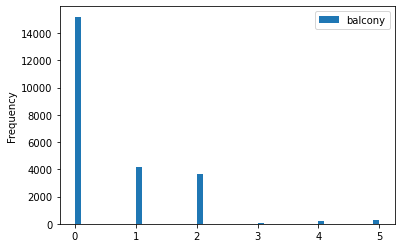

In [60]:
# выведем гистограмму для столбца balcony

df.plot(y='balcony', kind='hist', bins=50);

Как видно из гистограммы, все значения столбца являются целыми числами, записанными в виде дроби.

In [61]:
# изменим тип данных значений столбца balcony на int

df['balcony'] = df['balcony'].astype('int')

#### floors_total

Проверим, все ли значения floors_total являются истинно целыми числами (1.0, 5.0, 10.0), или среди них присутствуют истинно дробные числа.

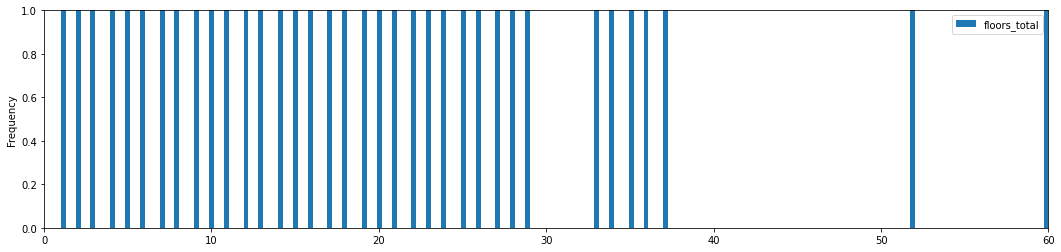

In [62]:
# выведем гистограмму для столбца floors_total

df.plot(y='floors_total', kind='hist', xlim=(0, 60), ylim=(0, 1), bins=200, figsize=(18, 4));

По гистограмме видно, что все значения столбца floors_total являются истинно целыми числами, следовательно, мы можем не опасаться искажения данных.

#### parks_around3000

Проверим, все ли значения parks_around3000 являются истинно целыми числами (1.0, 5.0, 10.0), или среди них присутствуют истинно дробные числа.

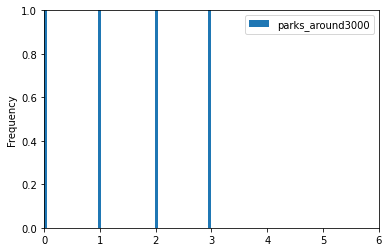

In [63]:
# выведем гистограмму для столбца parks_around3000

df.plot(y='parks_around3000', kind='hist', xlim=(0, 6), ylim=(0, 1), bins=50);

По гистограмме видно, что все значения столбца parks_around3000 являются истинно целыми числами, следовательно, мы можем не опасаться искажения данных.

#### ponds_around3000

Проверим, все ли значения ponds_around3000 являются истинно целыми числами (1.0, 5.0, 10.0), или среди них присутствуют истинно дробные числа.

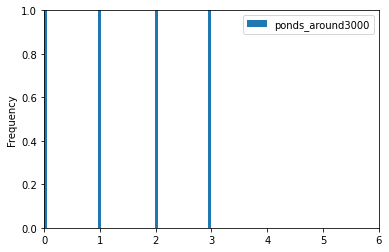

In [64]:
# выведем гистограмму для столбца ponds_around3000

df.plot(y='ponds_around3000', kind='hist', xlim=(0, 6), ylim=(0, 1), bins=50);

По гистограмме видно, что все значения столбца ponds_around3000 являются истинно целыми числами, следовательно, мы можем не опасаться искажения данных.

### Обработка аномальных значений

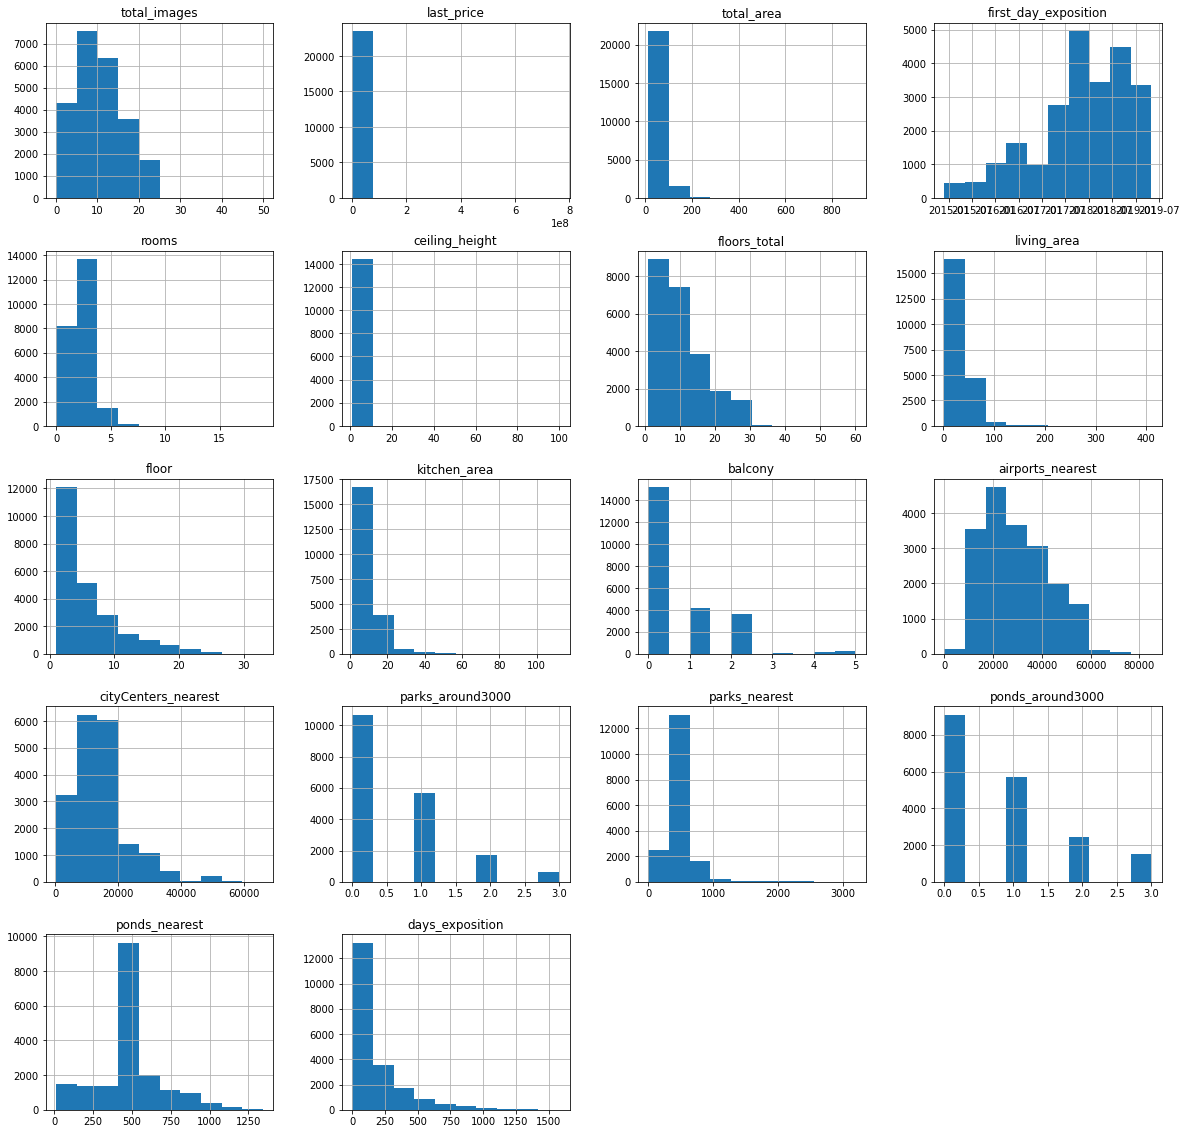

In [65]:
# вновь построим гистограммы для всех столбцов датафрейма с числовыми значениями

df.hist(figsize=(20, 20));

Изучив гистограммы, уже можно определить, в каких столбцах все значения лежат в пределах разумной нормы, а в каких данные следует проверить более детально.

#### last_price

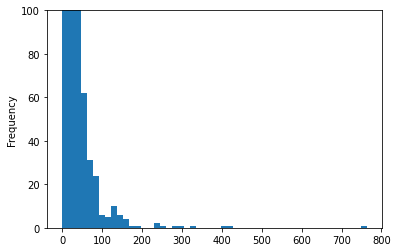

In [66]:
# построим более наглядную гистограмму для столбца last_price

(df['last_price'] / 1000000).plot(y=('last_price'), kind='hist', bins=50, ylim=(0, 100));

Как мы видим, в данных присутствуют явные аномалии - значения более 200 миллионов.

In [67]:
# выведем строки датафрейма со значением last_price более 200 миллионов

df.query('last_price > 200000000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,460.0,2.0,198.0,50.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,460.0,2.0,198.0,199.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,460.0,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,460.0,2.0,318.0,106.0
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


**Удалим аномальные значения**.

In [68]:
df = df.drop(df[(df['last_price'] > 200000000)].index)

#### total_area

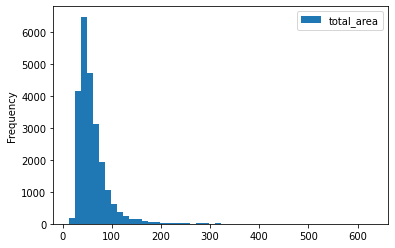

In [69]:
# вновь построим гистограмму для столбца total_area

df.plot(y='total_area', kind='hist', bins=50);

Как мы видим, в данных присутствуют аномалии - значения более 200 квадратных метров.

In [70]:
# выведем строки датафрейма со значением total_area более 200

df.query('total_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,False,False,NaN,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
509,5,90000000.0,225.0,2016-06-26,6,NaN,4.0,134.0,2,False,False,False,19.5,2,Санкт-Петербург,32864.0,5720.0,0.0,460.0,2.0,519.0,416.0
521,20,25717300.0,230.1,2015-01-21,3,NaN,3.0,130.0,1,False,False,False,26.1,1,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4.0,181.8,2,False,False,False,21.9,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5.0,99.8,4,False,False,False,27.4,0,Санкт-Петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,NaN
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4.0,82.4,4,False,False,False,40.1,0,Санкт-Петербург,37268.0,15419.0,0.0,460.0,0.0,503.0,NaN
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.4,5,False,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0


**Удалим аномальные значения**.

In [71]:
df = df.drop(df[(df['total_area'] > 200)].index)

#### first_day_exposition

В столбце first_day_exposition могут быть аномальные значения - либо слишком "старые" значения типа datetime (например, 1970-01-01), либо те значения, которые можно отнести к будущему времени (например, 2100-01-01).

In [72]:
# выведем первые пять значений столбца first_day_exposition, отсортированного по возрастанию значений

df['first_day_exposition'].sort_values().head()

3873    2014-11-27
696     2014-11-27
4812    2014-11-27
15427   2014-11-27
617     2014-11-27
Name: first_day_exposition, dtype: datetime64[ns]

In [73]:
# выведем последние пять значений столбца first_day_exposition, отсортированного по возрастанию значений

df['first_day_exposition'].sort_values().tail()

12208   2019-05-03
15881   2019-05-03
13746   2019-05-03
15072   2019-05-03
12003   2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]

Аномальных значений не обнаружено.

#### rooms

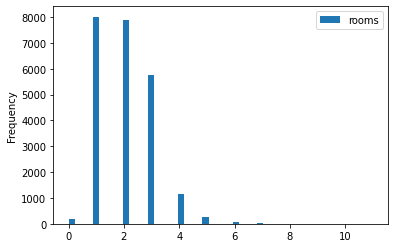

In [74]:
# построим более наглядную гистограмму для столбца rooms

df.plot(y='rooms', kind='hist', bins=50);

Из гистограммы видно, что значения больше 7 встречаются редко. Выведем соответствующие значения.

In [75]:
# выведем значения столбца, больше 7

df.query('rooms > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,460.0,0.0,503.0,NaN
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,False,False,False,5.0,0,Санкт-Петербург,21589.0,1152.0,1.0,587.0,2.0,155.0,115.0
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5.0,107.0,1,False,False,False,7.2,0,Санкт-Петербург,26080.0,4782.0,2.0,473.0,0.0,503.0,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0


**Значения больше 8 являются аномальными. Удалим их**.

In [76]:
df = df.drop(df[(df['rooms'] > 8)].index)

#### ceiling_height

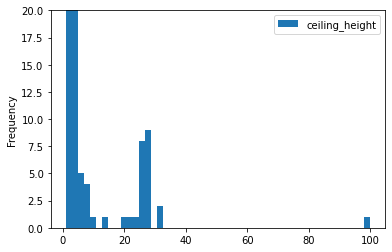

In [77]:
# построим более наглядную гистограмму для столбца ceiling_height

df.plot(y='ceiling_height', kind='hist', bins=50, ylim=(0, 20));

Изучив данные из [открытых источников](https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov), я пришел к выводу, что максимально возможная высота потолков в квартирных домах составляет 10 м. Следовательно, **значения больше 10 метров являются аномальными** - квартир с такой высотой потолков не бывает.

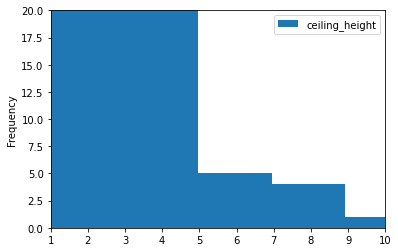

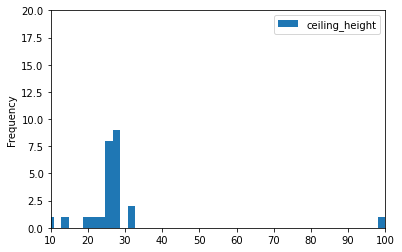

In [78]:
# построим более наглядные гистограммы для столбца ceiling_height

df.plot(y='ceiling_height', kind='hist', bins=50, xlim=(1, 10), ylim=(0, 20));

df.plot(y='ceiling_height', kind='hist', bins=50, xlim=(10, 100), ylim=(0, 20));

Можно сделать предположение, что появление данных аномалий связано с банальной ошибкой - например, человек мог указать 22 м вместо 2.2 м. Это логично, т.к. такие значения не единичны, и большая их часть находится в интервале от 10 до 32 м - что соответствует зоне пикового распределения значений от 1 до 10 м. В таком случае **перезапишем аномальные значения, поделив их на 10**.

In [79]:
# создадим функцию, которая будет делить аномальные значения в ceiling_height на 10

def ceiling_height_improver(elem):
    if elem > 10:
        elem /= 10
    return elem

In [80]:
# применим функцию к столбцу ceiling_height

df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height_improver)

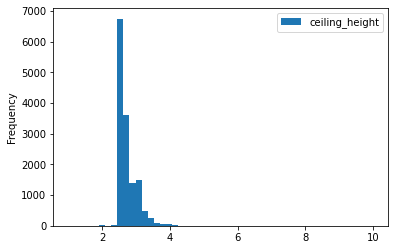

In [81]:
# вновь построим гистограмму для столбца ceiling_height

df.plot(y='ceiling_height', kind='hist', bins=50);

Проверим наличие аномальных значений среди наименьших значений столбца.

In [82]:
# выведем список уникальных значений столбца, отсортированный по возрастанию

sorted(df['ceiling_height'].unique())

[1.0,
 1.03,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.7,
 nan,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 

**Удалим значения менее 2 м**.

In [83]:
df = df.drop(df[(df['ceiling_height'] < 2)].index)

<a id='ceilh'></a>

Теперь можем **заполнить пропуски медианным значением**.

In [84]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

#### balcony

Хотя столбец balcony уже был проверен на аномалии при изменении типов данных, последняя гистограмма этого столбца выглядит странно.

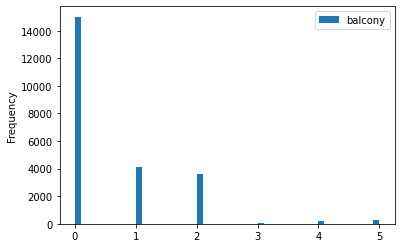

In [85]:
# построим более наглядную гистограмму для столбца balcony

df.plot(y='balcony', kind='hist', bins=50);

In [86]:
# выведем список уникальных значений столбца, отсортированный по возрастанию

sorted(df['balcony'].unique())

[0, 1, 2, 3, 4, 5]

По гистограмме видно, что аномальных значений нет.

### Переименование столбцов

In [87]:
# выведем названия столбцов датафрейма

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Из названий всех столбцов сразу бросается в глаза 'cityCenters_nearest', написанный в ВерблюжемРегистре. Это не является синтаксической ошибкой, тем не менее в Python принято использовать змеиный_регистр.

In [88]:
# изменим название столбца cityCenters_nearest на to_city_center_m

df = df.rename(columns={'cityCenters_nearest': 'to_city_center_m'})

## Добавление новых столбцов в таблицу

### Цена одного квадратного метра

In [89]:
# добавим в датафрейм столбец с ценой одного квадратного метра квартиры

df['sq_meter_price'] = df['last_price'] / df['total_area']

### День публикации объявления

In [90]:
# добавим в датафрейм столбец с номером дня недели, в который объявление было опубликовано 

df['day_exposition'] = df['first_day_exposition'].dt.weekday

В датафрейм был добавлен столбец с номером дня недели, в который объявление было опубликовано. Соответствие номера дня недели приведено в выводе нижней ячейки.

In [91]:
pd.DataFrame(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
            columns=['День недели'])

,День недели
0,Понедельник
1,Вторник
2,Среда
3,Четверг
4,Пятница
5,Суббота
6,Воскресенье


### Месяц публикации объявления

In [92]:
# добавим в датафрейм столбец с номером месяца публикации объявления

df['month_exposition'] = df['first_day_exposition'].dt.month

### Год публикации объявления

In [93]:
# добавим в датафрейм столбец с годом публикации объявления

df['year_exposition'] = df['first_day_exposition'].dt.year

### Тип этажа квартиры

In [94]:
# создадим функцию, которая будет возвращать тип этажа в зависимости
# от этажа квартиры и количества этажей в доме

def floor_typer(data):
    floor = data['floor']
    floors_total = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    if floor > 0:
        return 'другой'

In [95]:
# добавим в датафрейм столбец с типом этажа квартиры

df['floor_type'] = df.apply(floor_typer, axis=1)

### Расстояние до центра города в км

In [96]:
# добавим в датафрейм столбец с расстоянием до центра города в км

df['to_city_center_km'] = round(df['to_city_center_m'] / 1000)

В случае округления полученных значений функцией round, округление произойдет до ближайшего целого числа. В таком случае в столбце появится значение 0 километров, что будет выглядеть странным (никто не скажет "моя квартир находится в доме в 0 километров до центра". Чаще принято указывать количество километров до центра города, округляя значение в большую сторону. Поступим также.

In [97]:
# импортируем библиотеку math

import math

In [98]:
# округлим значения в to_city_center_km до целых чисел в большую сторону

df['to_city_center_km'] = \
df.query('to_city_center_km > 0')['to_city_center_km'].apply(math.ceil)

## Проведите исследовательский анализ данных

### Общий анализ данных

Выведем гистограмму для каждого столбца датафрейма с числовыми значениями и исследуем данные.

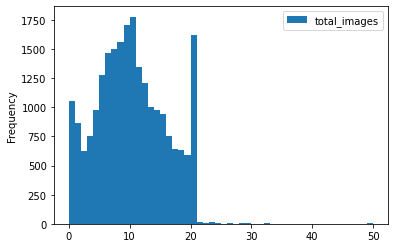

In [99]:
df.plot(y='total_images', kind='hist', bins=50);

In [100]:
# посчитаем количество строк со значением столбца total_images от 0 до 20 включительно

df.query('0 <= total_images <= 20')['total_images'].count()

23282

In [101]:
# посчитаем количество строк со значением столбца total_images, равным нулю

df.query('total_images == 0')['total_images'].count()

1053

In [102]:
# посчитаем количество строк со значением столбца total_images, большим 20

df.query('total_images > 20')['total_images'].count()

73

Данные из гистограммы говорят нам о том, практически для всех объявлений (23282) количество фотографий составляет от 0 до 20. Притом для 1053 объявлений фотографии отсутствуют. Количество объявлений с более чем 20 фотографиями составляет 73.

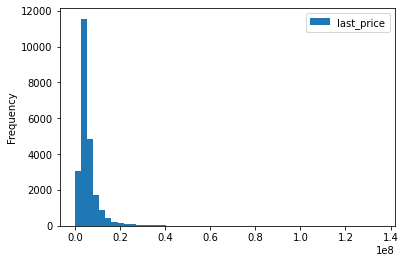

In [103]:
df.plot(y='last_price', kind='hist', bins=50);

In [104]:
# посчитаем количество строк со значением столбца last_price от 0 до 40 миллионов включительно

df.query('0 <= last_price <= 40000000')['last_price'].count()

23273

In [105]:
# посчитаем количество строк со значением столбца last_price, равным нулю

df.query('last_price == 0')['last_price'].count()

0

In [106]:
# посчитаем количество строк со значением столбца last_price, большим 40 миллионов

df.query('last_price > 40000000')['last_price'].count()

82

Практически все значения (23273) столбца last_price находятся в интервале до 40 миллионов рублей. Притом значения, равные нулю в датафрейме отсутствуют. Значений более 40 миллионов всего 82.

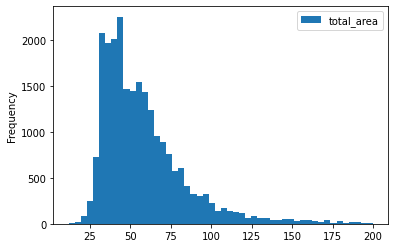

In [107]:
df.plot(y='total_area', kind='hist', bins=50);

Как мы видим, большая часть данных располагается в диапазоне от 25 до 100 квадратных метров. Притом значения более 175 встречаются крайне редко.

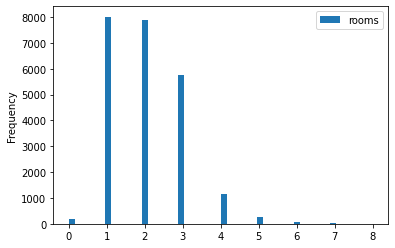

In [108]:
df.plot(y='rooms', kind='hist', bins=50);

По гистограмме видно, что наиболее часто встречающиеся значения количества комнат - 1, 2 и 3. Безкомнатные квартиры и квартиры с количеством комнат 5 и более достаточно редко.

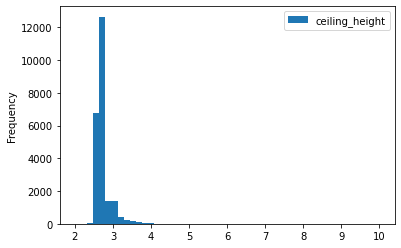

In [109]:
df.plot(y='ceiling_height', kind='hist', bins=50);

In [110]:
# выведем уникальные значения столбца ceiling_height по убыванию частоты

df['ceiling_height'].value_counts()

2.65    9724
2.50    3518
2.60    1644
2.70    1576
3.00    1089
        ... 
4.80       1
3.42       1
3.29       1
2.34       1
4.14       1
Name: ceiling_height, Length: 160, dtype: int64

Из гистограммы понятно, что большая часть значений высоты потолков находится в диапазоне от 2.5 до 3 м. Пик значений приходится на 2.65 м.

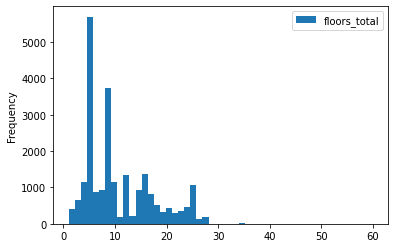

In [111]:
df.plot(y='floors_total', kind='hist', bins=50);

In [112]:
# выведем уникальные значения столбца floors_total по убыванию частоты

df['floors_total'].value_counts()

5.0     5699
9.0     3740
16.0    1366
12.0    1353
10.0    1161
4.0     1161
25.0    1070
6.0      866
17.0     828
3.0      649
7.0      564
14.0     552
18.0     504
24.0     459
2.0      373
8.0      371
15.0     365
23.0     349
19.0     336
22.0     286
20.0     269
13.0     228
11.0     199
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
33.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Гистограмма имеет нехарактерную для нормального распределения форму. По массиву наблюдается несколько пиков - 5 и 9 этажей, а также несколько доньев - 11 и 13 этажей. БольшАя часть значений находится в диапазоне от 2 до 10 этажей, а также от 14 до 25 этажей.

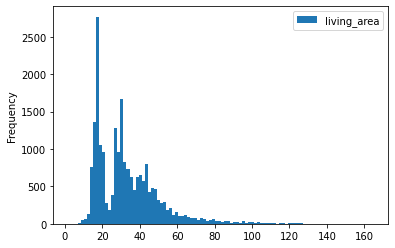

In [113]:
df.plot(y='living_area', kind='hist', bins=100);

In [114]:
# выведем уникальные значения столбца living_area по убыванию частоты

df['living_area'].value_counts()

18.000000     881
17.000000     674
30.000000     598
16.000000     485
20.000000     479
             ... 
29.599998       1
49.250000       1
125.100000      1
33.470000       1
16.740000       1
Name: living_area, Length: 1655, dtype: int64

На гистограмме наблюдается один ярко выраженный пик - 18 квадратных метров. Данный график также не является гистограммой нормального распределения: наблюдается большое количество значений в диапазоне от 15 до 20 квадратных метров, а затем в диапазоне от 25 до 50 квадратных метров.

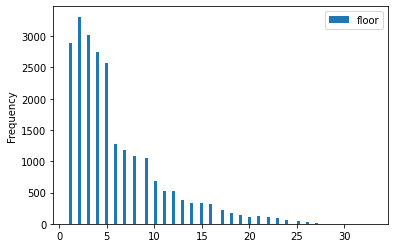

In [115]:
df.plot(y='floor', kind='hist', bins=100);

Большая часть значений столбца floor приходится на интервал от 1 до 5 этажей, притом пик значений приходится на 2 этаж. Далее наблюдается спад количества значений при увеличении этажа, через каждые последующие 5 этажей вплоть до 20 наблюдается резкий спад частоты встречи значений.

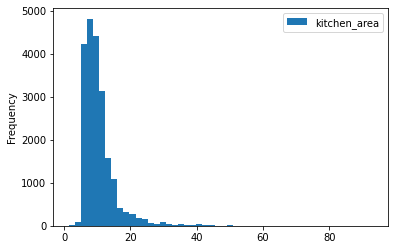

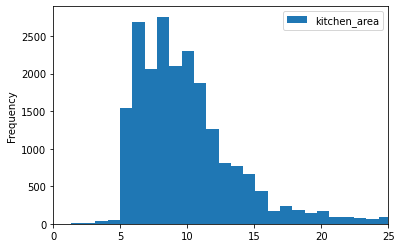

In [116]:
df.plot(y='kitchen_area', kind='hist', bins=50);

df.plot(y='kitchen_area', kind='hist', bins=100, xlim=(0, 25));

Большая часть значений находится в диапазоне от 5 до 12.5 квадратных метров. Значения более 21 квадратного метра встречаются достаточно редко.

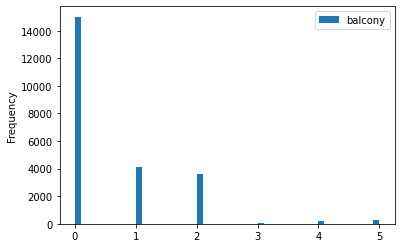

In [117]:
df.plot(y='balcony', kind='hist', bins=50);

Пик значений стобца с количеством балконов приходится на 0. Также достаточно часто встречаются квартиры с 1 и 2 балконами. Количество квартир от 3 до 5 балконов достаточно мало, однако наблюдается зависимость к их увеличению при увеличении числа балконов в данном диапазоне. Это может быть связано с тем, что количество балконов в 1 или 2 является оптимальным для квартир средней ценовой категории. Количество балконов от 3 и более скорее приходится на элитную недвижимость, а для данной категории характерно большее количество балконов, откуда и соответствующая зависимость.

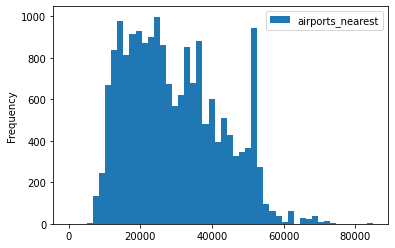

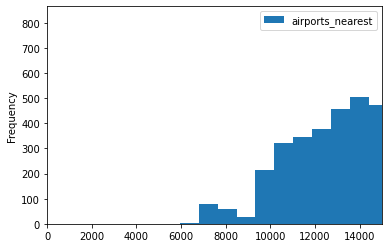

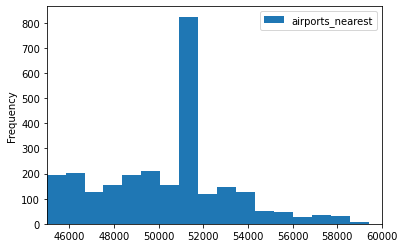

In [118]:
df.plot(y='airports_nearest', kind='hist', bins=50);

df.plot(y='airports_nearest', kind='hist', bins=100, xlim=(0, 15000));

df.plot(y='airports_nearest', kind='hist', bins=100, xlim=(45000, 60000));

Как видно из гистограмм, подавляющая часть значений находится в интервале от 9 тысяч метров до 54 тысяч метров. Значения, не входящие в данный интервал, встречаются крайне редко. Отдельные пики внутри данного интервала, скорее всего, связана с густотой населения в отдельных районах Санкт-Петербурга или населенных пунктах, т.к. в Санкт-Петербурге и Ленинградской области находится лишь один гражданский аэропорт.

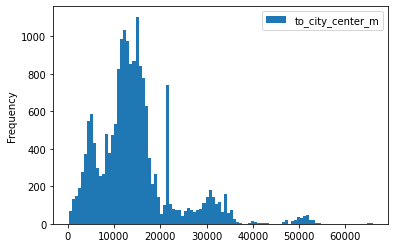

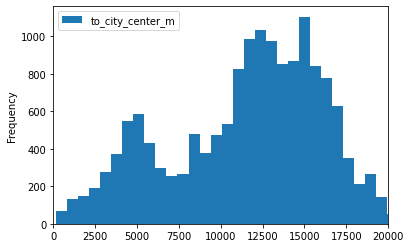

In [119]:
df.plot(y='to_city_center_m', kind='hist', bins=100);

df.plot(y='to_city_center_m', kind='hist', bins=100, xlim=(0, 20000));

Подавляющая часть значений находится в интервале от 0 до 20 тысяч метров до центра города. Отдельные пики как внутри данного интервала, так и за его пределами скорее всего также связаны с густотой населения в отдельных районах Санкт-Петербурга или населенных пунктах в его составе или в Ленинградской области.

Также по гистограмме видно, что большая часть значений находится в промежутке между 11 тысячами и 17 тысячами километров.

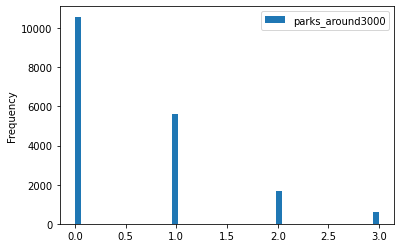

In [120]:
df.plot(y='parks_around3000', kind='hist', bins=50);

Чаще всего парков в радиусе 3000 метров от квартиры не встречается - таких случаев более 10 тысяч в датафрейме. Почти для 6000 объявлений в данном радиусе находится один парк. 2 и 3 парка в радиусе 3 км встречаются менее чем для 2 тысяч и 1 тысячи квартир соответственно.

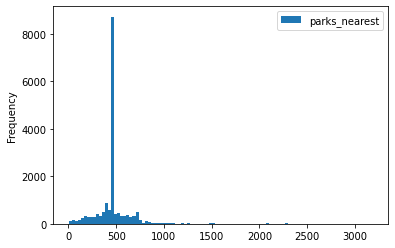

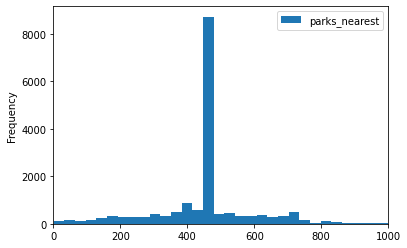

In [121]:
df.plot(y='parks_nearest', kind='hist', bins=100);

df.plot(y='parks_nearest', kind='hist', bins=100, xlim=(0, 1000));

In [122]:
# выведем уникальные значения столбца parks_nearest по убыванию частоты

df['parks_nearest'].value_counts()

460.0     8321
733.0      323
393.0      218
399.5      157
367.0      135
          ... 
861.0        1
779.0        1
726.0        1
2905.0       1
929.0        1
Name: parks_nearest, Length: 993, dtype: int64

На гистограмме наблюдается огромный пик для 8321 квартиры, соответствующий значению 460 м. Следующие по частоте встречи значения имеют многократно более скромные показатели - от 323 до 135 квартир. Это может быть связано с наличием огромного количества объявлений в каких-либо новых многоэтажных домах, которые сейчас часто и много строятся.

Помимо этого следует отметить, что значения более 850 встречаются крайне редко.

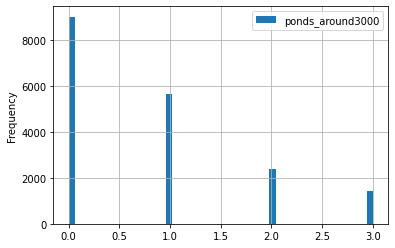

In [123]:
df.plot(y='ponds_around3000', kind='hist', bins=50, grid=True);

Чаще всего в радиусе 3000 метров от квартиры водоемов не встречается - таких случаев более 8 тысяч в датафрейме. Почти для 6000 объявлений в данном радиусе находится один водоем. 2 и 3 водоема в радиусе 3 км встречаются менее чем для 2.5 тысяч и 1.8 тысячи квартир соответственно.

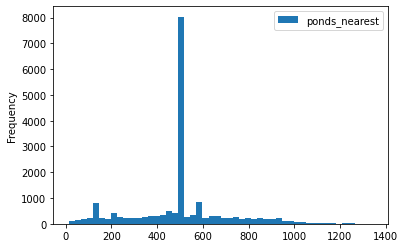

In [124]:
df.plot(y='ponds_nearest', kind='hist', bins=50);

In [125]:
# выведем уникальные значения столбца ponds_nearest по убыванию частоты

df['ponds_nearest'].value_counts()

503.0     7638
133.0      566
593.0      292
584.5      288
444.0      212
          ... 
1236.0       1
1075.0       1
137.0        1
1027.0       1
995.0        1
Name: ponds_nearest, Length: 1096, dtype: int64

На гистограмме наблюдается огромный пик для 7638 квартир, соответствующий значению 503 м. Следующие по частоте встречи значения имеют многократно более скромные показатели - от 566 до 212 квартир. Это также как и в случае с парками может быть связано с наличием огромного количества объявлений в каких-либо новых многоэтажных домах, которые сейчас часто и много строятся.

Также следует отметить, что значения более 1000 встречаются крайне редко.

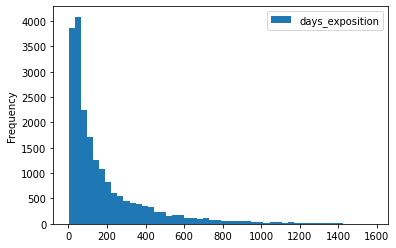

In [126]:
df.plot(y='days_exposition', kind='hist', bins=50);

Как видно из гистограммы, практически все значения столбца days_exposition находятся в интервале от 0 до 1000, а большая их часть - между 0 и 400. Пик значений приходится на промежуток 30-60 дней - в этот период с сайта были сняты более 4000 объявлений.

Более подробно исследуем данные из новых столбцов.

#### sq_meter_price

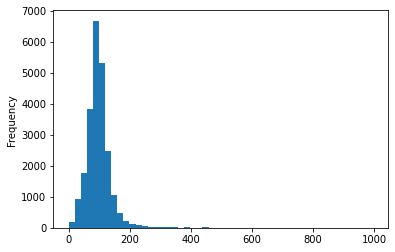

In [127]:
# построим гистограмму для столбца sq_meter_price

(df['sq_meter_price'] / 1000).plot(y='sq_meter_price', kind='hist', bins=50);

Как видно из гистограммы, практически все значения стоимости одного квадратного метра находятся в интервале 0-200 тысяч за квадратный метр.

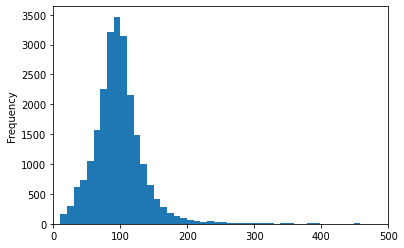

In [128]:
# построим более детальные гистограммы для столбца sq_meter_price

(df['sq_meter_price'] / 1000).plot(y='sq_meter_price', kind='hist', bins=100, xlim=(0, 500));

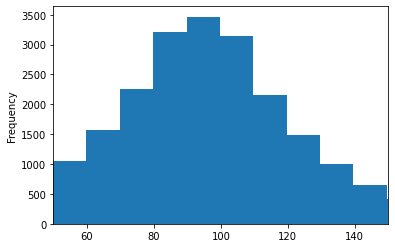

In [129]:

(df['sq_meter_price'] / 1000).plot(y='sq_meter_price', kind='hist', bins=100, xlim=(50, 150));

Изучив данную гистограмму становится понятно, что чаще всего квадратный метр стоит порядка 90-100 тысяч.

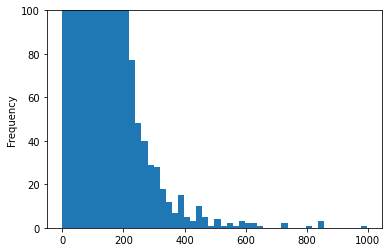

In [130]:
# построим еще одну более детальную гистограмму для столбца sq_meter_price

(df['sq_meter_price'] / 1000).plot(y='sq_meter_price', kind='hist', bins=50, ylim=(0, 100));

Начиная от 400 тысяч за квадратный метр значения встречаются достаточно редко - изучим соответствующие строки.

In [131]:
# выведем строки со значением sq_meter_price более 400 тысяч
# в порядке убывания стоимости квадратного метра

df.query('sq_meter_price > 400000').sort_values(by='sq_meter_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,to_city_center_m,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day_exposition,month_exposition,year_exposition,floor_type,to_city_center_km
4996,20,124000000.0,124.50,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,995983.935743,3,10,2017,другой,2.0
4859,16,28000000.0,33.00,2019-04-29,1,3.50,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,23447.0,1376.0,3.0,344.0,3.0,119.0,NaN,848484.848485,0,4,2019,другой,1.0
17172,14,28000000.0,33.00,2019-04-30,1,3.50,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,23403.0,1462.0,3.0,342.0,3.0,27.0,NaN,848484.848485,1,4,2019,другой,1.0
16647,15,122000000.0,145.00,2017-04-25,3,3.30,6.0,36.00,2,False,False,False,72.00,0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,841379.310345,1,4,2017,другой,7.0
17912,17,135000000.0,166.00,2019-02-07,3,3.30,7.0,52.00,1,False,False,False,64.00,0,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,NaN,813253.012048,3,2,2019,первый,6.0
8322,20,39900000.0,55.30,2017-10-26,1,3.05,6.0,35.00,4,False,False,False,8.00,4,Санкт-Петербург,25685.0,2136.0,1.0,72.0,3.0,202.0,NaN,721518.987342,3,10,2017,другой,2.0
6462,2,82000000.0,114.00,2015-12-17,3,2.65,5.0,78.50,4,False,False,False,20.00,0,Санкт-Петербург,22460.0,3400.0,2.0,218.0,3.0,69.0,651.0,719298.245614,3,12,2015,другой,3.0
21238,1,24412900.0,38.12,2018-06-27,1,2.65,10.0,16.83,4,False,False,False,10.70,1,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,44.0,640422.350472,2,6,2018,другой,NaN
20264,17,119000000.0,187.60,2017-07-10,4,6.00,7.0,147.00,7,False,False,False,15.60,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,634328.358209,0,7,2017,последний,6.0
16590,10,98000000.0,155.00,2017-12-16,3,2.65,8.0,NaN,6,False,False,False,NaN,0,Санкт-Петербург,32440.0,5297.0,0.0,460.0,2.0,198.0,90.0,632258.064516,5,12,2017,другой,5.0


Хотя вышеизученные значения и являются выдающимися, их нельзя назвать аномальными.
Поэтому **принимаем, что в столбце аномалий нет**.

#### day_exposition

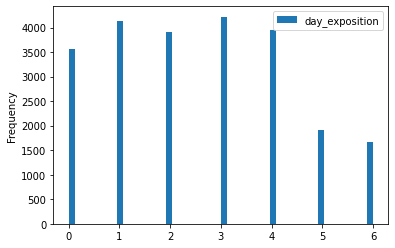

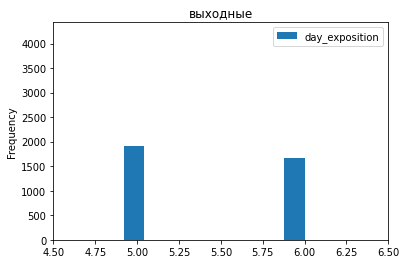

In [132]:
# построим гистограммы для столбца day_exposition

df.plot(y='day_exposition', kind='hist', bins=50);

df.plot(y='day_exposition', kind='hist', bins=50, xlim=(4.5, 6.5), title='выходные');

Из гистограммы видно, что наиболее популярным для публикации объявлений днем недели является четверг, а наименее популярным - воскресенье. В целом по будням выложено не менее 3500 объявлений в день. В выходные заметен спад - не более 2000 объявлений в сутки. 

В то же время нельзя сказать, что по ходу недели наблюдается какой-либо спад или подъем количества опубликованных объявлений. 

Такой характер распределения данных можно объяснить тем, что для многих публикация объявления о продаже квартиры является ответственным шагом, связанным с определенными заботами и, как следствие, вызывающим у людей не совсем приятные мысли. Такую работу людям легче сделать в будний день, чтобы в выходные - когда многие люди планируют отдыхать - их головы не были заняты соответствующими мыслями. 

С другой стороны, люди зачастую откладывают свои дела на выходнын, тем не менее распределение данных на гистограмме говорит нам о том, что первая версия, возможно, больше соответствует реальности.

#### month_exposition

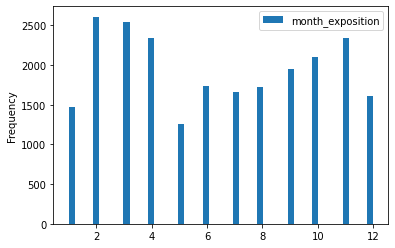

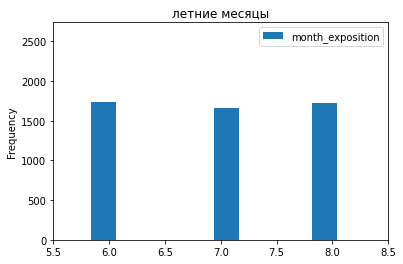

In [133]:
# построим гистограммы для столбца month_exposition

df.plot(y='month_exposition', kind='hist', bins=50);

df.plot(y='month_exposition', kind='hist', bins=50, xlim=(5.5, 8.5), title='летние месяцы');

Гистограмма показывает нам, что наиболее благоприятным месяцем для публикации объявлений является февраль - более 2500 объявлений, наименее благоприятным - май - менее 1500 объявлений. По ходу календарного года не наблюдается каких-либо общих тенденций по снижению или увеличению числа опубликованных объявлений. Тем не менее можно отметить, что больше всего публикаций приходится на период "февраль-апрель" с относительно плавным снижением количества опубликованных объявлений к апрелю, а также на период "сентябрь-ноябрь" с плавным увеличением числа публикаций. 

В свою очередь, значительно меньше объявлений появляется в декабре-январе (около 1500 для каждого месяце) и мае (менее 1500), а также немного меньше для каждого летнего месяца (порядка 1700). Это можно объяснить тем, что на данные месяцы приходится больше количество выходных (январь, май), а также большое количество отпусков (июнь-август). Декабрь может находиться в списке месяцев-аутсайдеров по количеству опубликованных объявлений ввиду близости к Новому году, а следовательно на него приходятся хлопоты по подготовке к данному празднику, вследствие чего у людей остается меньше времени на другие дела. 

#### year_exposition

In [134]:
# выведем самые ранние объявления

df['first_day_exposition'].sort_values().head()

2831    2014-11-27
21867   2014-11-27
13246   2014-11-27
3486    2014-11-27
696     2014-11-27
Name: first_day_exposition, dtype: datetime64[ns]

In [135]:
# выведем самые поздние объявления

df['first_day_exposition'].sort_values().tail()

12343   2019-05-03
10917   2019-05-03
12380   2019-05-03
15881   2019-05-03
9217    2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]

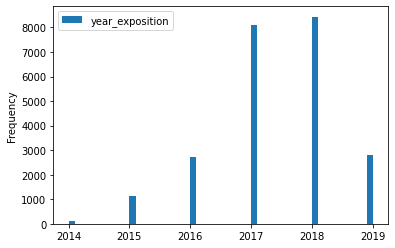

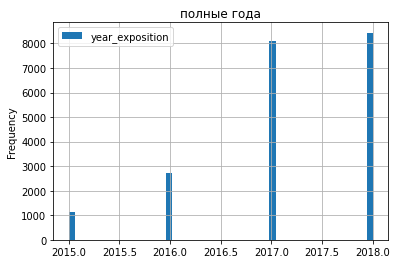

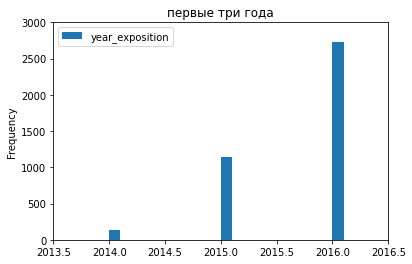

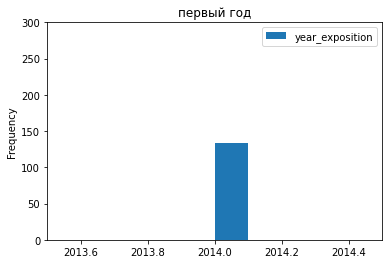

In [136]:
# построим гистограммы для столбца year_exposition

df.plot(y='year_exposition', kind='hist', bins=50);

df.query('year_exposition not in [2014, 2019]').plot(y='year_exposition', kind='hist', bins=50,
                                                     title='полные года', grid=True);

df.plot(y='year_exposition', kind='hist', bins=50, xlim=(2013.5, 2016.5), ylim=(0, 3000), title='первые три года');

df.plot(y='year_exposition', kind='hist', bins=50, xlim=(2013.5, 2014.5), ylim=(0, 300), title='первый год');

Прежде всего следует учесть, что первые объявления датируются 27 ноября 2014 года (т.е. концом года), а последние - 3 мая 2019 года. Из этого следует, что при изучении столбца year_exposition нам следует рассмотреть как данные в целом, так и данные только за полные года (с 2015 по 2018 включительно). 

Наибольшее количество объявлений было опубликовано в 2018 и 2017 годах - более 8000 в год, наименьшее:
- среди всех годовых промежутков - в первый год сбора данных - 2014 - менее 150 объявлений;
- среди полных годовых промежутков - в 2015 году - около 1100 объявлений.

Кроме того стоит отметить, что во все года, кроме 2017-2018, количество объявлений в год составляет менее 3000. 

В целом по полным годам наблюдается рост количества публикаций - с 2015 по 2017 относительно плавный - в каждом новом году объявлений появляется в 2.5 раза больше по сравнению с прошлым. В 2018 году количество опубликованных объявлений становится незначительно больше.

Такое распределение может быть обусловлено множеством факторов. Наиболее логичной выглядит следующая схема:
- в конце 2014 года начался сбор данных - отсюда минимальное и столь небольшое количество опубликованных объявлений;
- 2015 год был первым полным годом сбора данных, поэтому сравнивать его данные с данными за предыдущий год некорректно;
- в 2016 году сервис начинает набирать популярность - число опубликованных за год объявлений увеличивается в 2.5 раза;
- через год - в 2017 - тенденция роста в 2.5 раза сохраняется;
- в 2018 рост заметно замедляется - это может быть связано со [снижением ипотечных ставок](https://www.bn.ru/gazeta/articles/247197/), вследствие чего люди стали чаще покупать жилье в новостройках.

#### floor_type

<AxesSubplot:>

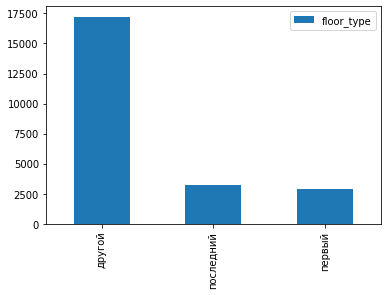

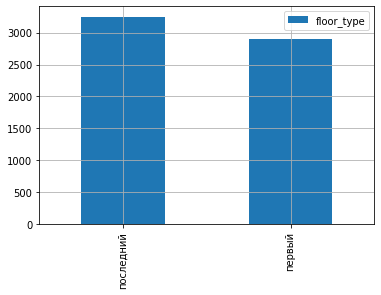

In [137]:
# построим столбчатые диаграммы для столбца floor_type

(
    pd.DataFrame(df['floor_type'].value_counts())
    .plot(y='floor_type', kind='bar')
)

(
    pd.DataFrame(df.query('floor_type == "последний" or floor_type == "первый"')['floor_type'].value_counts())
    .plot(y='floor_type', kind='bar', grid=True)
)

Как мы видим из гистограммы, наиболее часто встречающийся тип этажа - другой - количество квартир составляет чуть менее 17.5 тысяч. Такой результат полностью совпадает с ожидаемым. 

Количество квартир на последнем и первом этаже составляет порядка 3750 и 2900. 



### Анализ времени продажи квартир

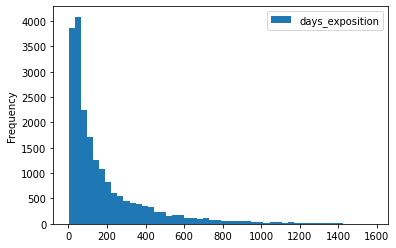

In [138]:
# построим гистограмму для столбца days_exposition

df.plot(y='days_exposition', kind='hist', bins=50);

Как видно из гистограммы, **практически все значения столбца days_exposition находятся в интервале от 0 до 1000, а большая их часть - между 0 и 400**.

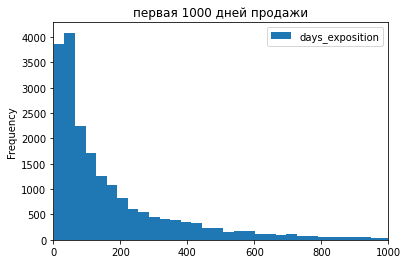

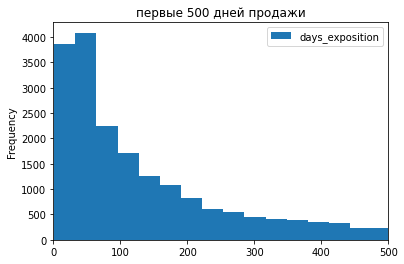

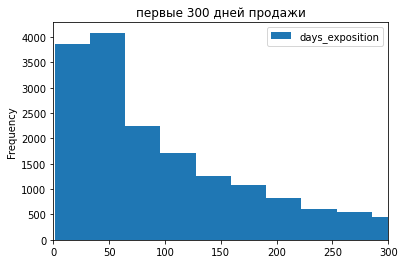

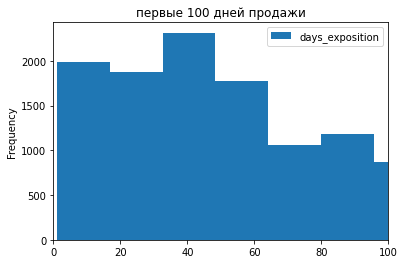

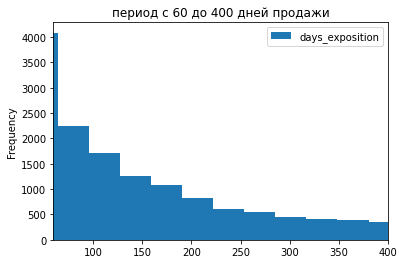

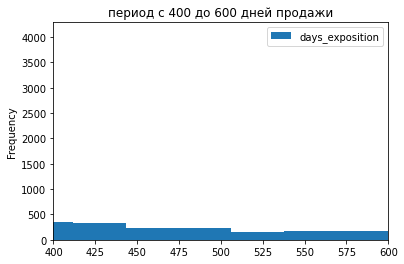

In [139]:
# построим более детальные гистограммы для столбца days_exposition

df.plot(y='days_exposition', kind='hist', bins=50, xlim=(0, 1000), title='первая 1000 дней продажи');

df.plot(y='days_exposition', kind='hist', bins=50, xlim=(0, 500), title='первые 500 дней продажи');

df.plot(y='days_exposition', kind='hist', bins=50, xlim=(0, 300), title='первые 300 дней продажи');

df.plot(y='days_exposition', kind='hist', bins=100, xlim=(0, 100), title='первые 100 дней продажи');

df.plot(y='days_exposition', kind='hist', bins=50, xlim=(60, 400), title='период с 60 до 400 дней продажи');

df.plot(y='days_exposition', kind='hist', bins=50, xlim=(400, 600), title='период с 400 до 600 дней продажи');

In [140]:
# рассчитаем среднее значение длительности продажи квартир

df['days_exposition'].mean()

179.57752664824318

In [141]:
# рассчитаем медиану длительности продажи квартир

df['days_exposition'].median()

95.0

Пик значений приходится на промежуток 30-60 дней - в этот период с сайта были сняты более 4000 объявлений. 

По построенным гистограммам и рассчитанным средним и медианным значениям можно сделать следующие выводы. 

**Чаще всего квартиры продаются в течение первых двух месяцев (60 дней) - это правило работает для порядка трети объявлений. Такие продажи можно назвать быстрыми**. Если квартира не была продана в этот период, то возрастает вероятность, что продаваться она будет дольше - уже для периода 60-90 дней количество проданных квартир (снятых объявлений) составляет порядка 2250 - что почти в два раза меньше, чем в первые два месяца - т.е. после первых двух месяцев наблюдается спад. Далее в течение 12 последующих месяцев (360 дней) продажи наблюдается плавное снижение количества проданных квартир по месяцам - с 1700 для 4 месяца (90-120 дней) и 1300 для 5 месяца (120-150 дней) до 400 для 14 месяца (390-420 дней) продажи. **Продажи после 400 дня публикации объявления можно назвать необычайно долгими**, т.к. далее гистограмма приобретает пологий вид и постепенно приближается к нулю. 

Медиана составляет 95 дней, что почти в два раза меньше среднего - 180 дней. Столь отличные значения скорее всего связаны с влиянием на среднее квартир, которые наиболее долго продавались - более 400 дней. Поэтому в качестве усредненного показателя примем медиану, которая говорит нам о том, что **в среднем квартиры продаются за 3 месяца**.

### Исследование влияния различных факторов на полную стоимость объекта

В начале исследования примем, что для подтверждения зависимости между полной стоимостью квартиры и различными параметрами коэффициент корреляции Пирсона должен быть не менее 0.5 - т.е. связь должна быть как минимум заметной ([1](https://intuit.ru/studies/courses/6/6/lecture/172?page=3), [2](https://www.syl.ru/article/229252/mod_koeffitsient-korrelyatsii-i-prichinno-sledstvennaya-svyaz-formulyi-i-ih-interpretatsiya)). 

Кроме того, для каждой пары параметров будут построены диаграммы рассеяния, которые также будут учитываться при определении наличия или отсутствия зависимости между каждой парой параметров.

#### Общая площадь квартиры

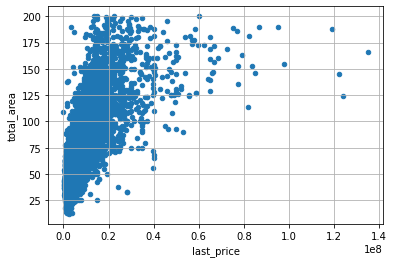

In [142]:
# построим диаграмму рассеяния для столбцов last_price и total_area

df.plot(x='last_price', y='total_area', kind='scatter', grid=True);

Хотя точки на диаграмме рассеяния расположены достаточно сумбурно, тем не менее на графике **прослеживается определенная зависимость между полной стоимостью квартиры и ее площадью при значениях последней до 125 кв. м.**

In [143]:
# вычислим коэффициент корреляции Пирсона для столбцов last_price и total_area

df['last_price'].corr(df['total_area'])

0.7156591390107458

Рассчитанный коэффициент корреляции говорит о наличии высокой связи между полной стоимостью квартиры и ее площадью. 

Учитывая вышеизложенное, я сделаю вывод, что **взаимосвязь между полной стоимостью квартиры и ее площадью имеет место**.

#### Жилая площадь квартиры

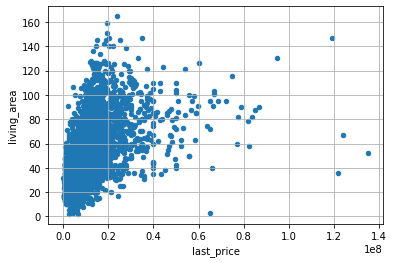

In [144]:
# построим диаграмму рассеяния для столбцов last_price и living_area

df.plot(x='last_price', y='living_area', kind='scatter', grid=True);

С первого взгляда заметно, что диаграмма рассеяния для столбцов last_price и living_area заметно напоминает аналогичный график для столбцов last_price и total_area. На новой диаграмме точки также расположены достаточно сумбурно, но и на этом графике **прослеживается тенденция к увеличению полной стоимостью квартиры при увеличении ее живой площади (при значениях последней до 60 кв. м.)**. Тем не менее, визуально зависимость кажется меньшей, чем для предыдущей пары параметров.

In [145]:
# вычислим коэффициент корреляции Пирсона для столбцов last_price и living_area

df['last_price'].corr(df['living_area'])

0.6019814199965489

**Рассчитанный коэффициент Пирсона** с одной стороны говорит о наличии заметной связи между полной стоимостью квартиры и ее живой площадью, с другой стороны **подтверждает вывод о том, что связь между данными параметрами меньше, чем связь между стоимостью квартиры и ее полной площадью**. 

Учитывая вышеизложенное, я сделаю вывод, что **взаимосвязь между полной стоимостью квартиры и ее живой площадью имеет место**.

#### Площадь кухни

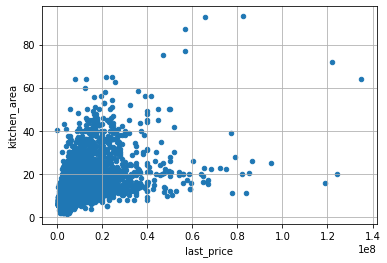

In [146]:
# построим диаграмму рассеяния для столбцов last_price и kitchen_area

df.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True);

Точки на данной диаграмме рассеяния расположены еще более сумбурно сумбурно, чем на двух предыдущих графиках. Тем не менее даже на таком графике **прослеживается определенная зависимость между полной стоимостью квартиры и площадью ее кухни при значениях последней до 10 кв. м.**

In [147]:
# вычислим коэффициент корреляции Пирсона для столбцов last_price и kitchen_area

df['last_price'].corr(df['kitchen_area'])

0.5623797806357076

Рассчитанный коэффициент корреляции говорит о наличии заметной связи между полной стоимостью квартиры и площадью ее кухни. 

Учитывая вышеизложенное, я сделаю вывод, что **взаимосвязь между полной стоимостью квартиры и площадью ее кухни имеет место**.

#### Количество комнат

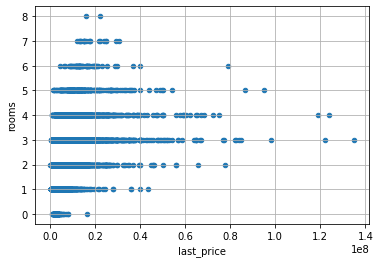

In [148]:
# построим диаграмму рассеяния для столбцов last_price и rooms

df.plot(x='last_price', y='rooms', kind='scatter', grid=True);

Изучив данную диаграмму, можно предположить, что при количестве комнат до 5 включительно связь между данным параметром и полной стоимостью квартиры прослеживается, однако при количестве комнат 6 и более связь как будто становится обратной (тем не менее не следует исключать фактор малой выборки объявлений с таким количеством комнат). 

Вычислим коэффициент корреляции Пирсона для более точной оценки зависимости.

In [149]:
# вычислим коэффициент корреляции Пирсона для столбцов last_price и rooms

df['last_price'].corr(df['rooms'])

0.4246953860761629

In [150]:
# вычислим коэффициент корреляции Пирсона для столбцов last_price и rooms
# для данных со значениями rooms меньше 6

df.query('rooms < 6')['last_price'].corr(df['rooms'])

0.412350968648114

Как показали расчеты коэффициентов корреляции, гипотеза о наличии взаимосвязи между полной стоимостью квартиры и количеством комнат в ней не подтвердилась ни для всей выборки, ни для выборки данных со значениями rooms 5 и меньше. 

Можем сделать вывод о том, что **взаимосвязи между полной стоимостью квартиры и количеством комнат в ней либо нет, либо она несет более сложный характер**.

#### Тип этажа

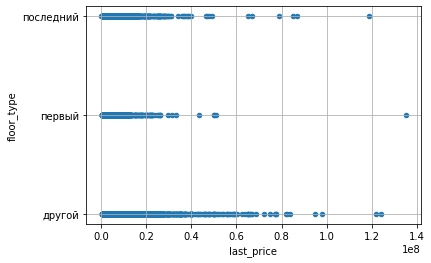

In [151]:
# построим диаграмму рассеяния для столбцов last_price и floor_type

df.plot(x='last_price', y='floor_type', kind='scatter', grid=True);

Диаграмма говорит нам о том, что квартиры с типом этажей "первый" имеют меньшую стоимость, чем квартиры с двумя прочими типами этажей. Провести сравнение стоимости квартир с типами этажей "последний" и "другой" по данной диаграмме достаточно сложно. 

Поэтому построим гистограммы стоимости квартир для квартир с разными типами этажей.

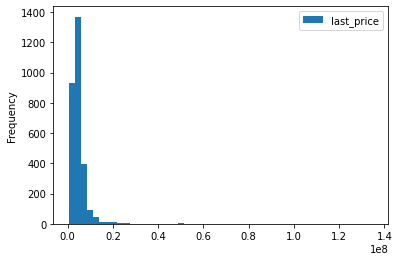

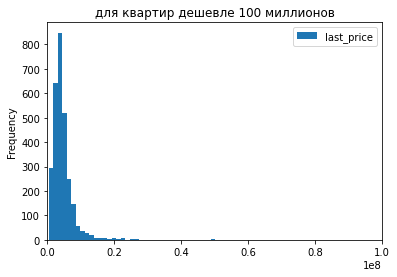

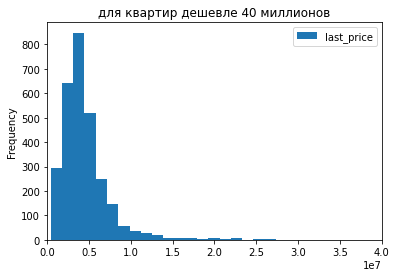

In [152]:
# отберем данные со значением столбца floor_type "первый"
# и построим по ним гистограмму для столбца last_price

df.query('floor_type == "первый"').plot(y='last_price', kind='hist', bins=50);

df.query('floor_type == "первый"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 100000000), title='для квартир дешевле 100 миллионов');

df.query('floor_type == "первый"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 40000000), title='для квартир дешевле 40 миллионов');

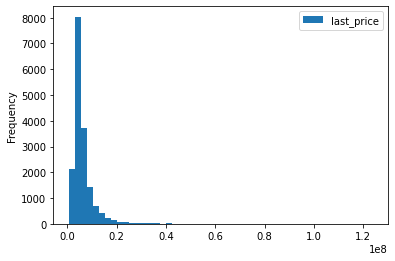

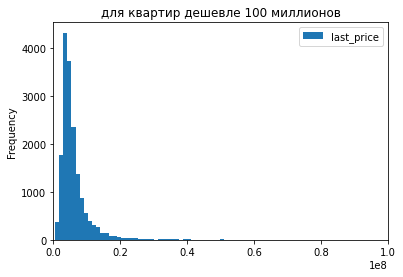

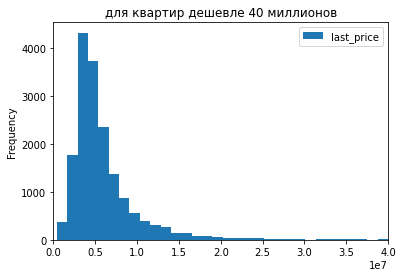

In [153]:
# отберем данные со значением столбца floor_type "другой"
# и построим по ним гистограмму для столбца last_price

df.query('floor_type == "другой"').plot(y='last_price', kind='hist', bins=50);

df.query('floor_type == "другой"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 100000000), title='для квартир дешевле 100 миллионов');

df.query('floor_type == "другой"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 40000000), title='для квартир дешевле 40 миллионов');

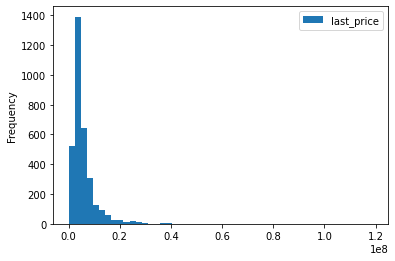

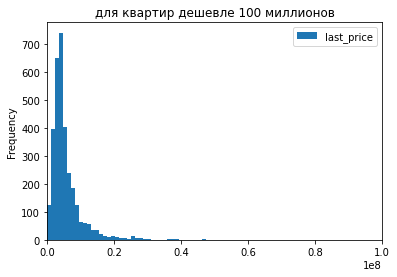

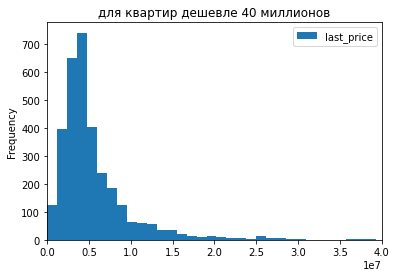

In [154]:
# отберем данные со значением столбца floor_type "последний"
# и построим по ним гистограмму для столбца last_price

df.query('floor_type == "последний"').plot(y='last_price', kind='hist', bins=50);

df.query('floor_type == "последний"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 100000000), title='для квартир дешевле 100 миллионов');

df.query('floor_type == "последний"').plot(y='last_price', kind='hist', bins=100,
                                           xlim=(0, 40000000), title='для квартир дешевле 40 миллионов');

Также для сгруппированных по каждому типу этажа данных рассчитаем среднее и медиану.

In [155]:
# рассчитаем среднюю стоимость квартир с типом этажа "первый"

df.query('floor_type == "первый"')['last_price'].mean()

4638749.865284974

In [156]:
# рассчитаем среднюю стоимость квартир с типом этажа "другой"

df.query('floor_type == "другой"')['last_price'].mean()

6250886.334979663

In [157]:
# рассчитаем среднюю стоимость квартир с типом этажа "последний"

df.query('floor_type == "последний"')['last_price'].mean()

5730872.746153846

In [158]:
# рассчитаем медианную стоимость квартир с типом этажа "первый"

df.query('floor_type == "первый"')['last_price'].median()

3900000.0

In [159]:
# рассчитаем медианную стоимость квартир с типом этажа "другой"

df.query('floor_type == "другой"')['last_price'].median()

4800000.0

In [160]:
# рассчитаем медианную стоимость квартир с типом этажа "последний"

df.query('floor_type == "последний"')['last_price'].median()

4250000.0

Полученные данные подтвердили тот факт, что квартиры с типом этажей "первый" имеют меньшую стоимость, чем квартиры с двумя другими типами этажей. 

Касательно данных для квартир с типами этажей "другой" и "последний", основываясь на гистограммах однозначные выводы в пользу какого-либо типа сделать нельзя, тем не менее медиана и среднее квартир на последних этажах больше, чем на других. Это говорит о том, что в целом квартиры на последнем этаже дороже, чем на другом.

#### Дата публикации объявления (день недели)

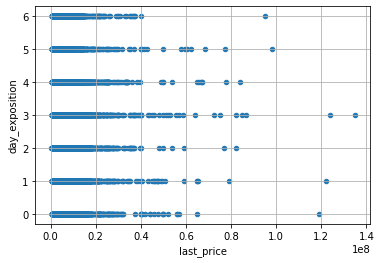

In [161]:
# построим диаграмму рассеяния для столбцов last_price и day_exposition

df.plot(x='last_price', y='day_exposition', kind='scatter', grid=True);

По данной диаграмме достаточно сложно провести сравнение стоимости квартир в зависимости от дня недели, в который объявление о продаже квартиры было опубликовано. Кроме того здравый смысл и логическое мышление подсказывают, что наличие связи между данными параметрами маловероятно. 

Тем не менее перепроверим данную гипотезу. Для этого построим соответствующие гистограммы.

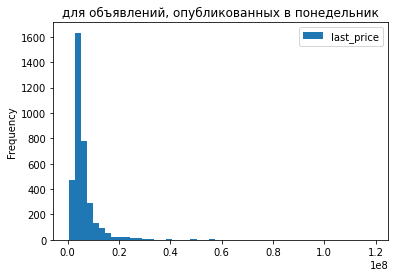

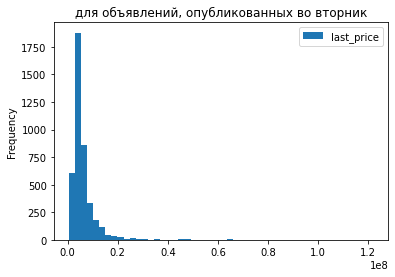

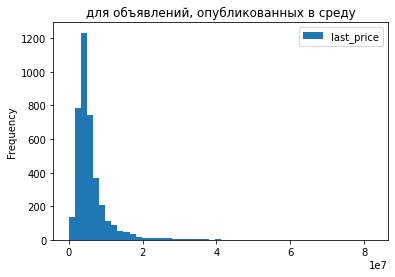

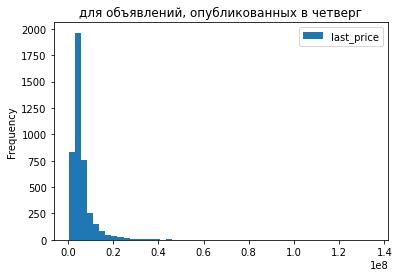

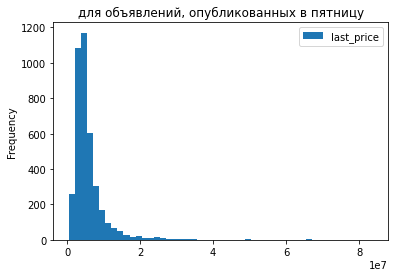

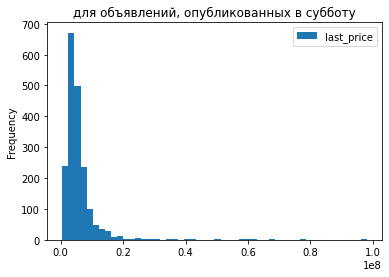

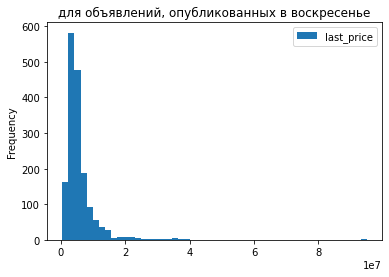

In [162]:
# сгруппируем данные по разным дням недели и
# построим гистограммы для столбца last_price

df.query('day_exposition == 0').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в понедельник');

df.query('day_exposition == 1').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных во вторник');

df.query('day_exposition == 2').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в среду');

df.query('day_exposition == 3').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в четверг');

df.query('day_exposition == 4').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в пятницу');

df.query('day_exposition == 5').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в субботу');

df.query('day_exposition == 6').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в воскресенье');

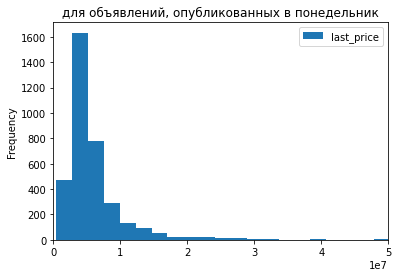

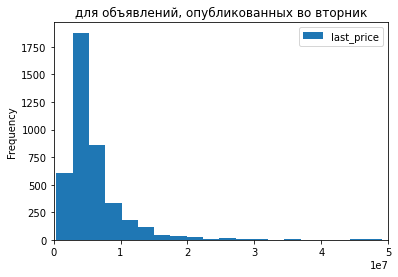

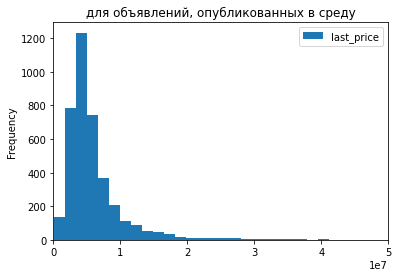

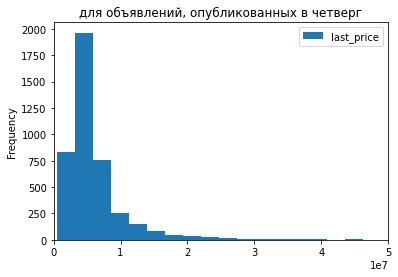

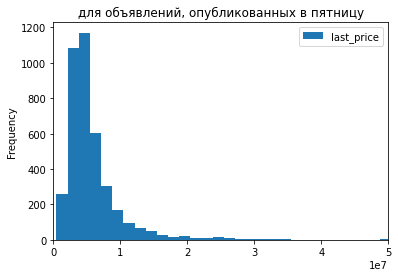

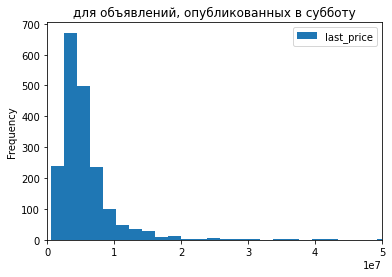

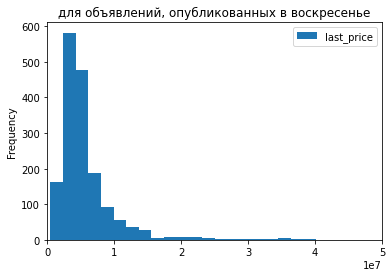

In [163]:
# построим более подробные гистограммы по сгруппированным данным для столбца last_price 

df.query('day_exposition == 0').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в понедельник', xlim=(0, 50000000));

df.query('day_exposition == 1').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных во вторник', xlim=(0, 50000000));

df.query('day_exposition == 2').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в среду', xlim=(0, 50000000));

df.query('day_exposition == 3').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в четверг', xlim=(0, 50000000));

df.query('day_exposition == 4').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в пятницу', xlim=(0, 50000000));

df.query('day_exposition == 5').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в субботу', xlim=(0, 50000000));

df.query('day_exposition == 6').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в воскресенье', xlim=(0, 50000000));

Данные, которые мы получили из гистограмм, можно отнести скорее к разряду интересных фактов, нежели к основе для серьезного изучения. 

Подводя итоги, по полученным гистограммам можно сделать вывод о том, что **какой-либо существенной связи между полной стоимостью квартиры и днем недели, в который было опубликовано объявление о продаже квартиры нет**.

#### Месяц публикации объявления

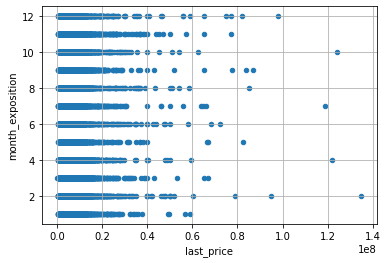

In [164]:
# построим диаграмму рассеяния для столбцов last_price и month_exposition

df.plot(x='last_price', y='month_exposition', kind='scatter', grid=True);

По данной диаграмме, ровно как и по предыдущей, достаточно сложно провести сравнение стоимости квартир в зависимости от месяца, в который объявление о продаже квартиры было опубликовано. 

Построим гистограммы для каждого месяца.

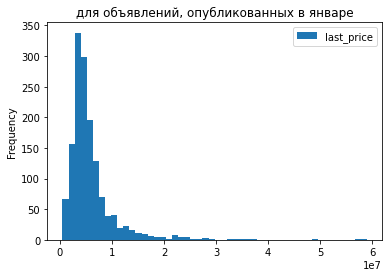

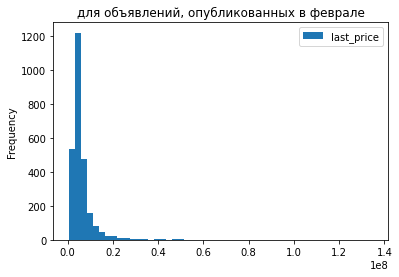

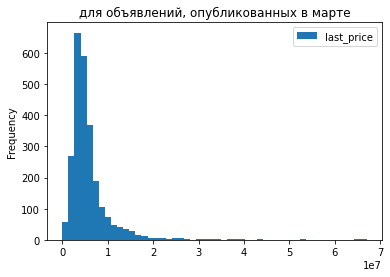

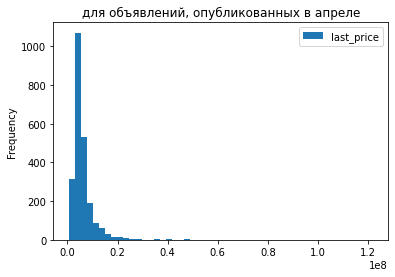

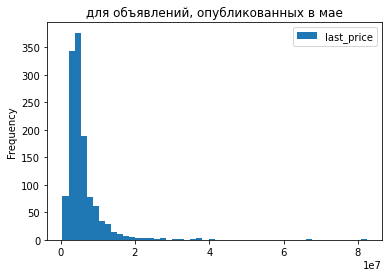

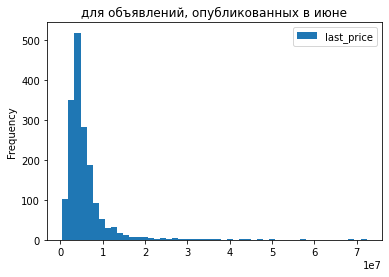

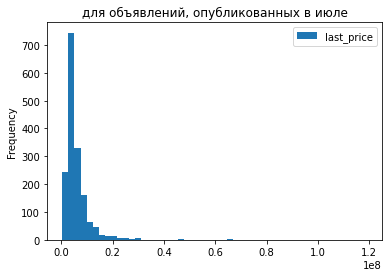

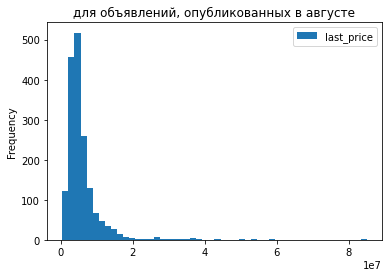

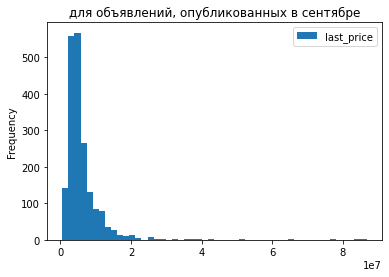

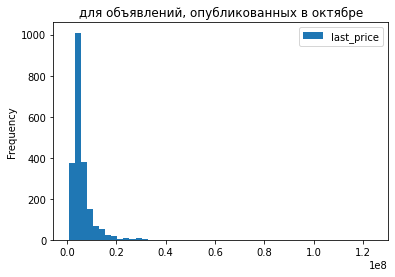

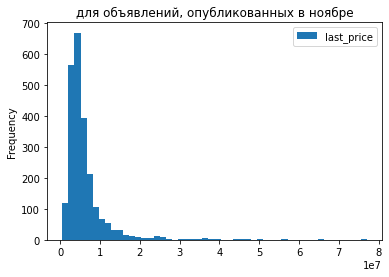

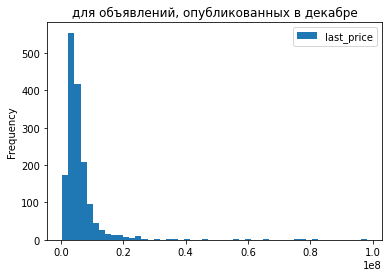

In [165]:
# сгруппируем данные по разным месяцам и
# построим гистограммы для столбца last_price

df.query('month_exposition == 1').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в январе');

df.query('month_exposition == 2').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в феврале');

df.query('month_exposition == 3').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в марте');

df.query('month_exposition == 4').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в апреле');

df.query('month_exposition == 5').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в мае');

df.query('month_exposition == 6').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в июне');

df.query('month_exposition == 7').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в июле');

df.query('month_exposition == 8').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в августе');

df.query('month_exposition == 9').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в сентябре');

df.query('month_exposition == 10').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в октябре');

df.query('month_exposition == 11').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в ноябре');

df.query('month_exposition == 12').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в декабре');

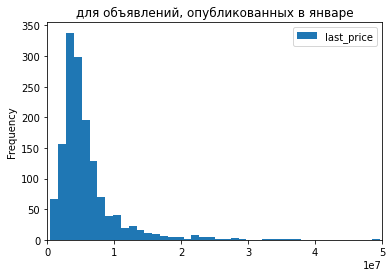

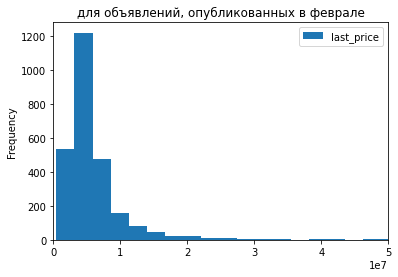

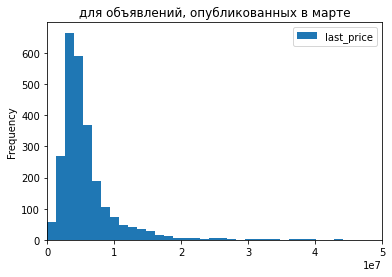

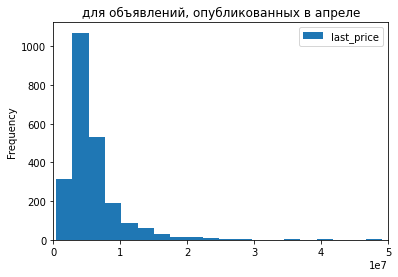

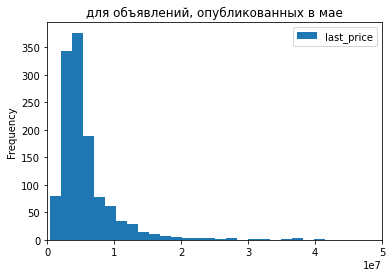

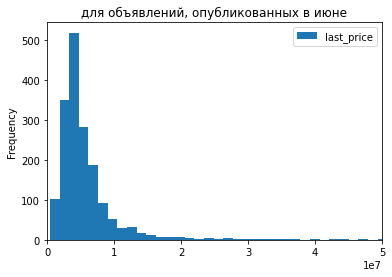

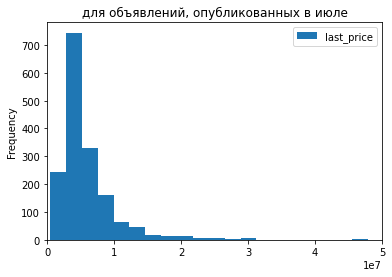

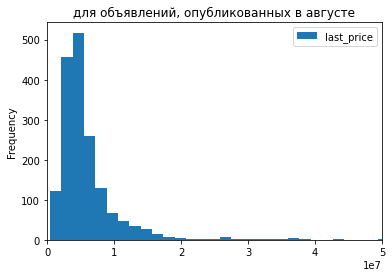

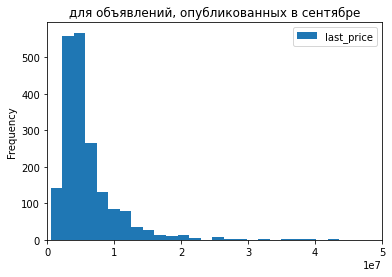

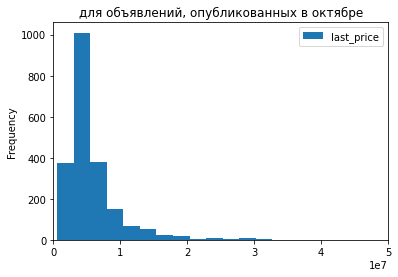

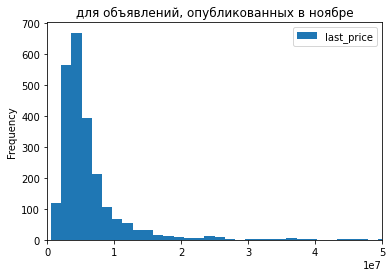

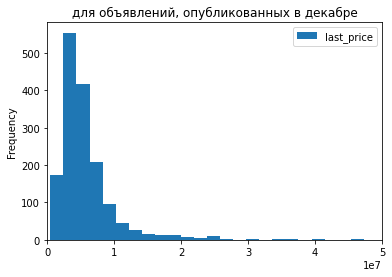

In [166]:
# построим более подробные гистограммы по сгруппированным данным для столбца last_price 

df.query('month_exposition == 1').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в январе', xlim=(0, 50000000));

df.query('month_exposition == 2').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в феврале', xlim=(0, 50000000));

df.query('month_exposition == 3').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в марте', xlim=(0, 50000000));

df.query('month_exposition == 4').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в апреле', xlim=(0, 50000000));

df.query('month_exposition == 5').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в мае', xlim=(0, 50000000));

df.query('month_exposition == 6').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в июне', xlim=(0, 50000000));

df.query('month_exposition == 7').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в июле', xlim=(0, 50000000));

df.query('month_exposition == 8').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в августе', xlim=(0, 50000000));

df.query('month_exposition == 9').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в сентябре', xlim=(0, 50000000));

df.query('month_exposition == 10').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в октябре', xlim=(0, 50000000));

df.query('month_exposition == 11').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в ноябре', xlim=(0, 50000000));

df.query('month_exposition == 12').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в декабре', xlim=(0, 50000000));

Полученные из гистограмм данные, в целом, не несут в себе какой-либо серьезной информации для исследования.
**Существенной связи между полной стоимостью квартиры и месяцем, в котором было опубликовано объявление о продаже квартиры, не наблюдается**.

#### Год публикации объявления

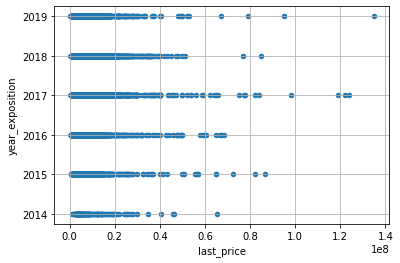

In [167]:
# построим диаграмму рассеяния для столбцов last_price и year_exposition

df.plot(x='last_price', y='year_exposition', kind='scatter', grid=True);

По данной диаграмме, как и по двум предыдущим, достаточно сложно провести сравнение стоимости квартир в зависимости от года, в который объявление о продаже квартиры было опубликовано.
Построим гистограммы для каждого полного года.

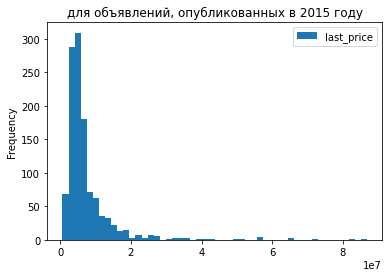

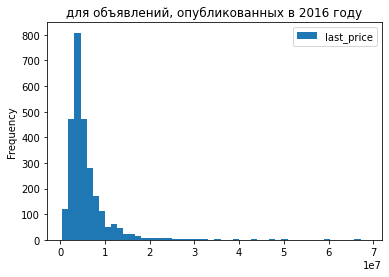

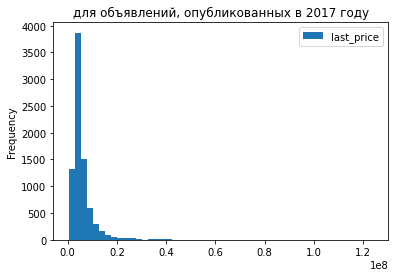

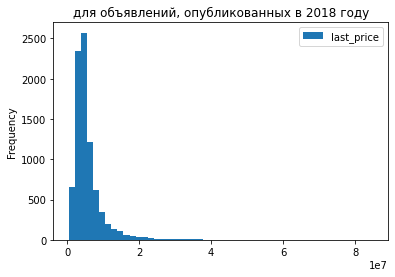

In [168]:
# сгруппируем данные по разным годам и
# построим гистограммы для столбца last_price

df.query('year_exposition == 2015').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2015 году');

df.query('year_exposition == 2016').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2016 году');

df.query('year_exposition == 2017').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2017 году');

df.query('year_exposition == 2018').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2018 году');

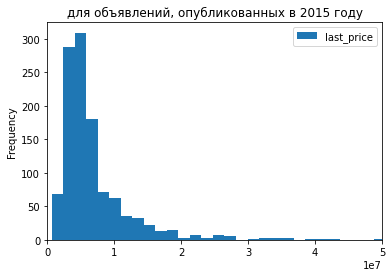

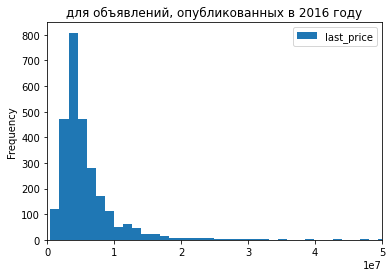

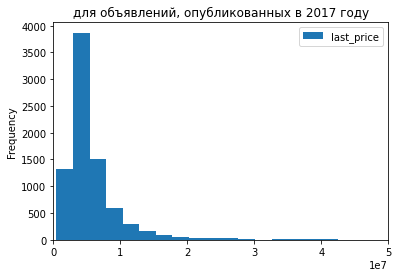

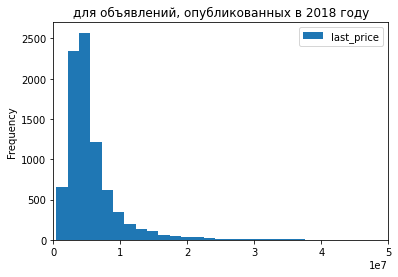

In [169]:
# построим более подробные гистограммы по сгруппированным данным для столбца last_price 

df.query('year_exposition == 2015').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2015 году', xlim=(0, 50000000));

df.query('year_exposition == 2016').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2016 году', xlim=(0, 50000000));

df.query('year_exposition == 2017').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2017 году', xlim=(0, 50000000));

df.query('year_exposition == 2018').plot(y='last_price', kind='hist', bins=50,
                                     title='для объявлений, опубликованных в 2018 году', xlim=(0, 50000000));

In [170]:
# выведем медиану стоимости квартир, опубликованных в 2015 году

df.query('year_exposition == 2015')['last_price'].median()

5250000.0

In [171]:
# выведем медиану стоимости квартир, опубликованных в 2016 году

df.query('year_exposition == 2016')['last_price'].median()

4500000.0

In [172]:
# выведем медиану стоимости квартир, опубликованных в 2017 году

df.query('year_exposition == 2017')['last_price'].median()

4500000.0

In [173]:
# выведем медиану стоимости квартир, опубликованных в 2018 году

df.query('year_exposition == 2018')['last_price'].median()

4530000.0

Наиболее дорогие квартиры появились на сайте в 2015 году, наименее - в 2016 и 2017. Интересный факт: медианы стоимости квартир, опубликованных в 2016-2017 годах (они равны) и 2018 году различаются между собой на 30 тысяч, медиана стоимости квартир за 2015 год превышает максимальную из трех вышеописанных на 720 тысяч.

Тем не менее, данные не несут в себе какой-либо важной для исследования информации. **Между полной стоимостью квартиры и годом, в котором было опубликовано объявление о продаже квартиры, не наблюдается существенной связи**.

### Анализ средней цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [174]:
# сохраним топ 10 населенных пунктов с наибольшим числом объявлений в список

top10 = df['locality_name'].value_counts().head(10).index

top10

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

Список выглядит правдоподобно: 8 из 10 городов в нем являются ближайшими пригородами Санкт-Петербурга, притом половина из них, согласно [административно-территориальному делению Санкт-Петербурга](https://ru.wikipedia.org/wiki/Административно-территориальное_деление_Санкт-Петербурга), входит в его состав. Другие два города - сам Санкт-Петербург - лидер по количеству объявлений - и Выборг - один из крупнейших городов Ленинградской области. 

Из списка топ 10 населенных пунктов также становится понятно, что преобладающая часть объявлений приходится либо на Санкт-Петербург, либо на его ближайшие пригороды (в топ 10 только один населенный пункт находится вдали от Петербурга - Выборг - и тот находится на 10 месте).

In [175]:
# рассчитаем среднюю цену одного квадратного метра для 10 населенных пунктах
# с наибольшим числом объявлений и выведем в отсортированном по убыванию цены виде

(
    df.query('locality_name in @top10')
    .pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price', ascending=False)
)

,sq_meter_price
locality_name,
Санкт-Петербург,113200.226884
Пушкин,103122.538840
деревня Кудрово,92473.547576
поселок Парголово,90332.263023
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75333.295801
Гатчина,68746.146763
Всеволожск,68654.473986


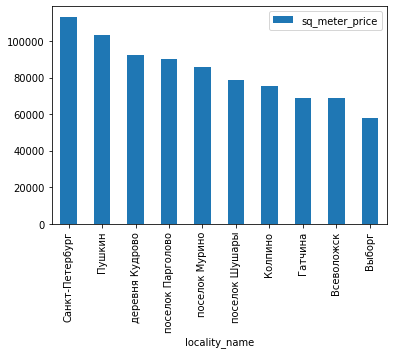

In [176]:
# построим столбчатую диаграмму для полученных значений

(
    df.query('locality_name in @top10')
    .pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price', ascending=False)
).plot(kind='bar', y='sq_meter_price');

Полученные данные показывают, что **в топ 10 городов по количеству объявлений наибольшая средняя цена одного квадратного метра принадлежит Санкт-Петербургу и составляет более 113 тысяч**. Далее располагаются его ближайшие пригороды - средняя цена одного квадратного метра для Пушкина составляет 103 тысячи, для Кудрово и Парголово немного превышает 90 тысяч, для остальных близлежащих пригородов находится в интервале от 86 тысяч до 68 тысяч. Дальний пригород Санкт-Петербурга Выборг замыкает топ 10 с показателем 58 тысяч. 

На диаграмме также стоит отметить довольно плавное снижение средней цены одного квадратного метра.

In [177]:
# выведем населенные пункты с самой высокой средней ценой одного квадратного метра

(
    df.pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price', ascending=False)
    .head()
)

,sq_meter_price
locality_name,
Зеленогорск,115122.799198
Санкт-Петербург,113200.226884
поселок Репино,104238.614786
Пушкин,103122.538840
Сестрорецк,101912.339326


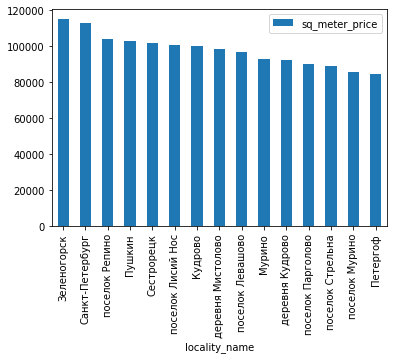

In [178]:
# построим столбчатую диаграмму для полученных значений

(
    df.pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price', ascending=False)
    .head(15)
).plot(kind='bar', y='sq_meter_price');

Как ни странно, **самая высокая средняя цена одного квадратного метра принадлежит не Санкт-Петербургу, который занимает вторую строчку в списке, а Зеленогорску**, и составляет 115 тысяч. Это можно объяснить тем фактом, что Зеленогорск, с одной стороны, административно входит в состав Санкт-Петербурга (т.е. его жители имеют петербургскую прописку), с другой стороны является городом, находящемся в курортномй зоне (даже входит в Курортный район Санкт-Петербурга): имеет выход к Финскому заливу, множество хвойных лесов. Третью и пятую строчку в списке городов с наибольшей средней ценой одного квадратного метра также занимают населенные пункты, входящие в состав Курортного района Санкт-Петербурга - поселок Репино и город Сестрорецк, а четвертую - входящий в Пушкинский район Петербурга город Пушкин. Значения средней цены одного квадратного метра для всех трех пригородов находится в интервале от 105 тысяч до 101 тысячи. 

Можем сделать вывод о том, что **наиболее дорогая недвижимость находится либо в самом Санкт-Петербурге, либо в пригородах в его составе**.

In [179]:
# выведем населенные пункты с самой низкой средней ценой одного квадратного метра

(
    df.pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price')
    .head()
)

,sq_meter_price
locality_name,
деревня Старополье,11206.221198
поселок Свирь,11481.481481
деревня Вахнова Кара,11688.311688
деревня Выскатка,12335.480902
поселок Совхозный,12629.129129


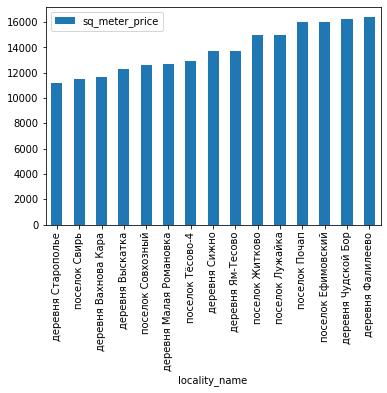

In [180]:
# построим столбчатую диаграмму для полученных значений

(
    df.pivot_table(index='locality_name', values='sq_meter_price')
    .sort_values(by='sq_meter_price')
    .head(15)
).plot(kind='bar', y='sq_meter_price');

Полученные данные говорят нам о том, что **наименьшие средние цены одного квадратного метра приходятся на отдаленные от Санкт-Петербурга населенные пункты, в основном - деревенского типа. Такой результат полностью совпадает с ожидаемым**.

### Исследование зависимости стоимости квартир в Санкт-Петербурге от расстояния до города

Проверим максимальное расстояние до центра Санкт-Петербурга для объявлений из этого города.

In [181]:
# выделим квартиры в Санкт-Петербурге 
# и выведем максимальное расстояние до центра Санкт-Петербурга

df.query('locality_name == "Санкт-Петербург"')['to_city_center_km'].max()

29.0

In [182]:
# посчитаем среднее значение стоимости квартиры в Санкт-Петербурге 

df.query('locality_name == "Санкт-Петербург"')['last_price'].mean()

7252578.259180105

In [183]:
# посчитаем медиану стоимости квартиры в Санкт-Петербурге 

df.query('locality_name == "Санкт-Петербург"')['last_price'].median()

5500000.0

In [184]:
# выведем список уникальных значений столбца to_city_center_km

df.query('locality_name == "Санкт-Петербург"')['to_city_center_km'].unique()

array([16., 14.,  7.,  8., 12., 15., 11., 13., 10.,  2.,  4., 17.,  5.,
        9.,  3.,  6., 21., 18.,  1., 24., 26., 22., 20., 23., 25., 27.,
       28., 19., nan, 29.])

Теперь мы можем вычислить среднюю цену квартир для каждого километра и построить графики.

In [185]:
# выведем сводную таблицу со средними ценами квартир в Санкт-Петербурге для каждого километра

(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='to_city_center_km', values='last_price')
)

,last_price
to_city_center_km,
1.0,1.281641e+07
2.0,1.359459e+07
3.0,1.027508e+07
4.0,1.086685e+07
5.0,1.153823e+07
6.0,1.241402e+07
7.0,1.362223e+07
8.0,8.941963e+06
9.0,6.903278e+06


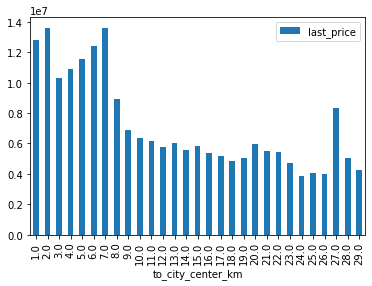

In [186]:
# построим столбчатую диаграмму для полученных значений

(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='to_city_center_km', values='last_price')
    .plot(kind='bar', y='last_price')
);

In [187]:
# выведем коэффициент корреляции Пирсона для столбцов last_price и to_city_center_km

df['last_price'].corr(df['to_city_center_km'])

-0.3111950949087518

Как ни странно, наиболее дорогие квартиры находятся не в самом центре Санкт-Петербурга, а в радиусе двух километров от него: средняя цена квартиры составляет 13.5 миллионов рублей. Аналогичный параметр для квартир не дальше 1 километра до центра - более 12.5 миллионов, для квартир в радиусе 3 километров - 10 миллионов рублей. 

Затем для квартир в радиусе от 4 до 7 километров заметен рост - средняя цена равномерно возрастает от 10.9 миллионов до 13.6 миллионов рублей. Затем для квартир не дальше 8 км до центра заметен резкий спад - средняя цена уменьшается до 8.9 миллионов рублей. После этого средняя цена продолжает падать - для квартир в радиусе 9 километров от центра города также достаточно резко - средняя цена составляет чуть менее 7 миллионов, а далее достаточно плавно.

Одной из причин высоких средних цен для квартир в радиусах 4-7 км до центра Санкт-Петербурга может быть тот факт, что на разницу расстояний 7 и 3 км приходятся Петроградская сторона, а также Васильевский и Каменный острова - фешенебельные районы Санкт-Петербурга с дорогой недвижимостью.

Как мы видим по столбчатой диаграмме, в целом для квартир после 7 километра наблюдается тенденция к снижению средней цены. Однако есть два значения, соответствующие 20 и 27 километру, которые заметно выбиваются из общей тенденции - они составляют более 6 миллионов и 8.3 миллионов соответственно. Объяснить данный феномен можно тем фактом, что в радиусе 20 км от центра Петербурга сконцентрированы Мистолово, Левашово и Стрельна, а в радиусе 27 км - Сестрорецк, Пушкин и Петергоф. Перечисленные поселения входят в топ 15 населенных пунктов с наибольшей средней стоимостью квартир. Однако в таком случае получается, что квартиры из перечисленных населенных пунктов были отнесены не к соответствующим поселениям, а к Санкт-Петербургу. Учитвая тот факт, что административно многие из оных относятся к Санкт-Петербургу, а также факт высокой стоимости квартир, находящихся в соответствующих таким городам радиусных расстояниях, такое вполне возможно.

Подводя итоги исследования, мы можем сделать вывод о том, что в целом тенденция к снижению стоимости квартиры при удалении от центра наблюдается, однако она характерна для значений, соответствующих расстоянию от 8 километров и дальше от центра города.
Кроме того следует отметить, что квартиры, находящиеся в непосредственной близости к центру города, имеют стоимость значительно превышающую как среднее значение и медиану по Санкт-Петербургу в целом, так и средние стоимости квартир по километрам.

Тем не менее в ходе исследования был найден фактор, влияющий на стоимость квартиры сильнее, чем расстояние до центра города - фешенебельность района / населенного пункта внутри города. Данный фактор "вытянул" средние значения стоимости квартир некоторых групп вверх, вне зависимости от близости квартир данных групп к центру города.

## Общий вывод

На основе предоставленных данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет был проведен ряд исследований и исследовательских анализов. Целью исследований было определение параметров, влияющих на рыночную стоимость объектов недвижимости, для ее будущей оценки при помощи данных параметров.

После завершения предобработки данных, в датафрейм были добавлены следующие столбцы: цена одного квадратного метра; день недели, месяц и год публикации объявления; тип этажа квартиры; расстояние до центра города в км.

Затем был произведен **общий анализ данных**, который выявил определенные закономерности для различных параметров, а именно:
1) цена одного квадратного метра
- преобладающая часть значений находится в интервале до 200 тысяч рублей за квадратный метр;
- наиболее часто встречающиеся значения - 90-100 тысяч рублей;
2) день недели, в который было опубликовано объявление
- наиболее популярным для публикации объявлений днем недели является четверг, наименее популярным - воскресенье;
- по будням выложено не менее 3500 объявлений в день, выходные заметен спад - не более 2000 объявлений в сутки;
- нельзя сказать, что по ходу недели наблюдается какой-либо спад или подъем количества опубликованных объявлений;
3) месяц публикации объявления
- наиболее благоприятным месяцем для публикации объявлений является февраль - более 2500 объявлений, наименее благоприятным - май - менее 1300 объявлений;
- по ходу календарного года не наблюдается каких-либо общих тенденций по снижению или увеличению числа опубликованных объявлений;
- больше всего публикаций приходится на период "февраль-апрель", а также на период "сентябрь-ноябрь";
- значительно меньше объявлений появляется в декабре-январе (около 1500 для каждого месяца) и мае (менее 1500);
4) год публикации объявления
- первые объявления датируются 27 ноября 2014 года (т.е. концом года), а последние - 3 мая 2019 года;
- полными годами (с опубликованными объявлениями за каждый месяц) можно назвать оные с 2015 по 2018 включительно;
- наибольшее количество объявлений было опубликовано в 2018 и 2017 годах - более 8000 в год;
- наименьшее среди всех годовых промежутков - в первый год сбора данных - 2014 - менее 150 объявлений, среди полных годовых промежутков - в 2015 году - около 1100 объявлений;
- по полным годам наблюдается рост количества публикаций;
5) тип этажа
- наиболее часто встречающийся тип этажа - другой - количество квартир составляет чуть менее 17.5 тысяч;
- количество квартир на последнем и первом этаже составляет порядка 3750 и 2900.

**Анализ времени продажи квартир**.

Результаты анализа:
- преобладающее количество значений находится в интервале до 1000 дней, большая часть - до 400 дней;
- пик значений приходится на промежуток 30-60 дней - в этот период с сайта были сняты более 4000 объявлений;
- медиана составляет 95 дней, что почти в два раза меньше среднего - 180 дней. Столь отличные значения скорее всего связаны с влиянием на среднее квартир, которые наиболее долго продавались - более 400 дней.

Выводы из анализа:
- чаще всего квартиры продаются в течение первых двух месяцев (60 дней) - это правило работает для порядка трети объявлений. Такие продажи можно назвать быстрыми;
- продажи после 400 дня публикации объявления можно назвать необычайно долгими;
- в среднем квартиры продаются за 3 месяца.

**Исследование влияния различных факторов на полную стоимость объекта**.

В начале исследования было принято, что для подтверждения зависимости между полной стоимостью квартиры и различными параметрами коэффициент корреляции Пирсона должен быть не менее 0.5 - т.е. связь должна быть как минимум заметной ([1](https://intuit.ru/studies/courses/6/6/lecture/172?page=3), [2](https://www.syl.ru/article/229252/mod_koeffitsient-korrelyatsii-i-prichinno-sledstvennaya-svyaz-formulyi-i-ih-interpretatsiya)).

- **параметр 1: общая площадь квартиры - взаимосвязь имеет место**.

Данный вывод был сформулирован на основе результатов расчета коэффициента корреляции Пирсона, оказавшегося равным 0.72, и построения диаграммы рассеяния для пары параметров: полная стоимость объекта-общая площадь квартиры.

- **параметр 2: жилая площадь квартиры - взаимосвязь имеет место**.

Данный вывод был сформулирован на основе результатов расчета коэффициента корреляции Пирсона, оказавшегося равным 0.60, и построения диаграммы рассеяния для пары параметров: полная стоимость объекта-жилая площадь квартиры.

- **параметр 3: площадь кухни - взаимосвязь имеет место**.

Данный вывод был сформулирован на основе результатов расчета коэффициента корреляции Пирсона, оказавшегося равным 0.56, и построения диаграммы рассеяния для пары параметров: полная стоимость объекта-площадь кухни.

- **параметр 4: количество комнат - взаимосвязи либо нет, либо она несет более сложный характер**.

Данный вывод был сформулирован на основе результатов расчета коэффициента корреляции Пирсона, оказавшегося равным 0.42, и построения диаграммы рассеяния для пары параметров: полная стоимость объекта-количество комнат.

- **параметр 5: тип этажа - взаимосвязь имеет место**.

Данный вывод был сформулирован на основе результатов построения диаграммы рассеяния для пары параметров: полная стоимость объекта-количество комнат, общих и более подробных гистограмм для данных, соответствующих каждому типу этажа, а также расчетов медиан и средних значений для сгруппированных по типу этажа данных.

Полученные данные подтвердили тот факт, что квартиры с типом этажей "первый" имеют меньшую стоимость, чем квартиры с двумя другими типами этажей. Основываясь на гистограммах, для квартир с типами этажей "другой" и "последний" однозначные выводы в пользу какого-либо типа сделать нельзя, тем не менее медиана и среднее квартир на последних этажах больше, чем на других. Это говорит о том, что в целом квартиры на последнем этаже дороже, чем на другом.

- **параметр 6: день недели, в который было опубликовано объявление - взаимосвязи либо нет, либо она несет более сложный характер**.

Данный вывод был сформулирован на основе результатов построения диаграммы рассеяния для пары параметров: полная стоимость объекта-день недели, в который было опубликовано объявление, общих и более подробных гистограмм для данных, соответствующих каждому дню недели.

Каких либо важных для исследования закономерностей в полученных данных обнаружено не было.

- **параметры 7: месяц публикации объявления - взаимосвязи либо нет, либо она несет более сложный характер**.

Данный вывод был сформулирован на основе результатов построения диаграммы рассеяния для пары параметров: полная стоимость объекта-месяц публикации объявления, общих и более подробных гистограмм для данных, соответствующих каждому месяцу.

Каких-либо важных для исследования закономерностей в полученных данных обнаружено не было.

- **параметры 8: год публикации объявления - взаимосвязи либо нет, либо она несет более сложный характер**.

Данный вывод был сформулирован на основе результатов построения диаграммы рассеяния для пары параметров: полная стоимость объекта-год публикации объявления, общих и более подробных гистограмм для данных, соответствующих каждому полному году, а также расчетов медиан и средних значений для сгруппированных по полным годам данных.

По полученныи данным нельзя сделать вывод о наличии каких-либо закономерностей между параметрами.

**Анализ средней цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**.

Результаты анализа:
- в топ 10 населенных пунктов с наибольшим числом объявлений вошли Санкт-Петербург, 8 городов, которые являются его ближайшими пригородами, а также дальний пригород Петербурга Выборг, один из крупнейших городов Ленинградской области;
- в топ 10 городов по количеству объявлений наибольшая средняя цена одного квадратного метра принадлежит Санкт-Петербургу и составляет более 113 тысяч рублей, далее располагаются его ближайшие пригороды - средняя цена одного квадратного метра для Пушкина составляет 103 тысячи, для Кудрово и Парголово немного превышает 90 тысяч, для остальных близлежащих пригородов находится в интервале от 86 тысяч до 68 тысяч рублей;
- самая высокая средняя цена одного квадратного метра среди всех населенных пунктов принадлежит Зеленогорску, а не Санкт-Петербургу, и составляет 115 тысяч рублей.

Выводы из анализа:
- из списка топ 10 населенных пунктов с наибольшим числом объявлений видно, что преобладающая часть объявлений приходится либо на Санкт-Петербург, либо на его ближайшие пригороды;
- наиболее дорогая недвижимость находится либо в самом Санкт-Петербурге, либо в пригородах в его составе;
- самая высокая средняя цена одного квадратного метра принадлежит Зеленогорску: это можно объяснить тем фактом, что административно Зеленогорск входит в состав Санкт-Петербурга (т.е. его жители имеют петербургскую прописку) и притом является поселением, находящемся в курортномй зоне. Точно такие же параметры имеют еще 2 населенных пункта в топ 5 по наибольшей средней цене;
- наименьшие средние цены одного квадратного метра приходятся на отдаленные от Санкт-Петербурга населенные пункты, в основном - деревенского типа.

**Исследование зависимости стоимости квартир в Санкт-Петербурге от расстояния до города**.

Результаты исследования:
- как ни странно, наиболее дорогие квартиры находятся не в самом центре Санкт-Петербурга, а в радиусе двух километров от него: средняя цена квартиры в радиусе первого километра составляет 13.5 миллионов рублей. Аналогичный параметр для квартир не дальше 1 километра до центра - более 12.5 миллионов, для квартир в радиусе 3 километров - 10 миллионов рублей;
- для квартир в радиусе от 4 до 7 километров заметен рост - средняя цена равномерно возрастает от 10.9 миллионов до 13.6 миллионов рублей;
- для квартир не дальше 8 км до центра заметен резкий спад - средняя цена уменьшается до 8.9 миллионов рублей;
- после этого средняя цена продолжает падать - для квартир в радиусе 9 километров от центра города также достаточно резко - средняя цена составляет чуть менее 7 миллионов, а далее достаточно плавно;
- в целом для квартир после 7 километра наблюдается тенденция к снижению средней цены, однако есть значения, которые заметно выбиваются из общей тенденции.

Выводы из исследования:
- в целом тенденция к снижению стоимости квартиры при удалении от центра наблюдается, однако она характерна для значений, соответствующих расстоянию от 8 километров и дальше от центра города;
- квартиры, находящиеся в непосредственной близости к центру города, имеют стоимость значительно превышающую как среднее значение и медиану по Санкт-Петербургу в целом, так и средние стоимости квартир по километрам;
- в ходе исследования был найден фактор, влияющий на стоимость квартиры сильнее, чем расстояние до центра города - фешенебельность района / населенного пункта внутри города. Данный фактор "вытянул" средние значения стоимости квартир некоторых групп вверх, вне зависимости от близости квартир данных групп к центру города.

**Общие рекомендации**:

Целью исследований было определение параметров, влияющих на рыночную стоимость объектов недвижимости, для ее будущей оценки при помощи данных параметров. К таким параметрам можно отнести следующие: 
- общая площадь квартиры - прямая зависимость (заметная связь - коэффициент Пирсона равен 0.65);
- жилая площадь квартиры - прямая зависимость (заметная связь - коэффициент Пирсона равен 0.56);
- площадь кухни - прямая зависимость (заметная связь - коэффициент Пирсона равен 0.52);
- тип этажа - для типа "первый" стоимость ниже, чем для типов "последний" и "другой", к типу "последний" чаще относятся экстрадорогие объекты недвижимости (дороже 300 миллионов рублей), а также квартиры дороже 10 миллионов рублей;
- фешенебельность района;
- близость расположения к центру Санкт-Петербурга (только для значений, соответствующих расстоянию от 8 километров и дальше от центра города) - прямая зависимость.

Следует учитывать данные параметры для будущей оценки рыночной стоимости объектов недвижимости.